In [1518]:
import pandas as pd

## Getting data

In [1519]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')
df_train.head(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   
5   6          50       RL         85.0    14115   Pave   NaN      IR1   
6   7          20       RL         75.0    10084   Pave   NaN      Reg   
7   8          60       RL          NaN    10382   Pave   NaN      IR1   
8   9          50       RM         51.0     6120   Pave   NaN      Reg   
9  10         190       RL         50.0     7420   Pave   NaN      Reg   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
5         Lvl    AllPub  ...        0    NaN  MnPrv        Shed     700   
6         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
7         Lvl    AllPub  ...        0    NaN    NaN        Shed     350   
8         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
9         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  
5     10   2009        WD         Normal     143000  
6      8   2007        WD         Normal     307000  
7     11   2009        WD         Normal     200000  
8      4   2008        WD        Abnorml     129900  
9      1   2008        WD         Normal     118000  

[10 rows x 81 columns]

At first it looks like there are many missing values

In [1520]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [1521]:
erased_columns = []

# EDA

## Univariate analysis

Columns with over 17% missing values, will get difficult to fill, that's why we are going to erase it

In [1522]:
import pandas as pd

def summarize_nulls(df):
    null_counts = df.isnull().sum()
    null_percentage = (null_counts / len(df)) * 100

    null_summary = pd.DataFrame({
        'Null Count': null_counts,
        'Null Percentage': null_percentage
    }).sort_values(by='Null Count', ascending=False)

    # Filter out columns that have no nulls
    null_summary = null_summary[null_summary['Null Count'] > 0]

    return null_summary

summary = summarize_nulls(df_train)
summary

Null Count  Null Percentage
PoolQC              1453        99.520548
MiscFeature         1406        96.301370
Alley               1369        93.767123
Fence               1179        80.753425
MasVnrType           872        59.726027
FireplaceQu          690        47.260274
LotFrontage          259        17.739726
GarageQual            81         5.547945
GarageFinish          81         5.547945
GarageType            81         5.547945
GarageYrBlt           81         5.547945
GarageCond            81         5.547945
BsmtFinType2          38         2.602740
BsmtExposure          38         2.602740
BsmtCond              37         2.534247
BsmtQual              37         2.534247
BsmtFinType1          37         2.534247
MasVnrArea             8         0.547945
Electrical             1         0.068493

As we can see there are columns that has over 50% of null values, but some columns has NA as category defined in the data_description.txt

### PoolQC case

In [1523]:
df_train['PoolQC'].value_counts()
# We will use NoPool as category for missing values

df_train['PoolQC'] = df_train['PoolQC'].fillna('NoPoolQC')

### MiscFeature case

In [1524]:
df_train['MiscFeature'].value_counts()
# We will use NoMiscFeature as category for missing values

df_train['MiscFeature'] = df_train['MiscFeature'].fillna('NoMiscFeature')

### Alley case

In [1525]:
df_train['Alley'].value_counts()
# We will use NoAlley as category for missing values

df_train['Alley'] = df_train['Alley'].fillna('NoAlley')

### Fence case

In [1526]:
df_train['Fence'].value_counts()
# We will use NoFence as category for missing values

df_train['Fence'] = df_train['Fence'].fillna('NoFence')

### MasVnrType case

In [1527]:
df_train['MasVnrType'].value_counts()
# We will use NoMasVnrType as category

df_train['MasVnrType'] = df_train['MasVnrType'].fillna('NoMasVnrType')

### FireplaceQu case

In [1528]:
df_train['FireplaceQu'].value_counts()
# We will use NoFireplaceQu as a category

df_train['FireplaceQu'] = df_train['FireplaceQu'].fillna('NoFireplaceQu')

### LotFrontage case

In [1529]:
df_train['LotFrontage'].value_counts()
# We will put 0 value to LotFrontage that has NA

df_train['LotFrontage'] = df_train['LotFrontage'].fillna(0)

### GarageQual case

In [1530]:
df_train['GarageQual'].value_counts
# We will change NA to NoGarageQueal

df_train['GarageQual'] = df_train['GarageQual'].fillna('NoGarageQual')

### GarageType case

In [1531]:
df_train['GarageType'].value_counts()
# We will put NoGarageType as category for NA values

df_train['GarageType'] = df_train['GarageType'].fillna('NoGarageType')

### GarageFinish case

In [1532]:
df_train['GarageFinish'].value_counts()
# We will put NoGarageFinish as a category for NA values

df_train['GarageFinish'] = df_train['GarageFinish'].fillna('NoGarageFinish')

### GarageCond case

In [1533]:
df_train['GarageCond'].value_counts()
# We will put NoGarageCond as a category for NA values

df_train['GarageCond'] = df_train['GarageCond'].fillna('NoGarageCond')

### BsmtFinType2 case

In [1534]:
df_train['BsmtFinType2'].value_counts()
# We will put NoBsmtFinType2 as a category for NA values

df_train['BsmtFinType2'] = df_train['BsmtFinType2'].fillna('NoBsmtFinType2')

### BsmtExposure case

In [1535]:
df_train['BsmtExposure'].value_counts()
# We will put NoBsmtExposure as a category for NA values

df_train['BsmtExposure'] = df_train['BsmtExposure'].fillna('NoBsmtExposure')

### BsmtCond case

In [1536]:
df_train['BsmtCond'].value_counts()
# we will use NoBsmtCond for NA values

df_train['BsmtCond'] = df_train['BsmtCond'].fillna('NoBsmtCond')

### BsmtQual case

In [1537]:
df_train['BsmtQual'].value_counts()
# we will use NoBsmtQual for NA values - Consider the amount of NA for the other Bsmt cols

df_train['BsmtQual'] = df_train['BsmtQual'].fillna('NoBsmtQual')

### BsmtFinType1 case

In [1538]:
df_train['BsmtFinType1'].value_counts()
# we will use NoBsmtFinType1 for NA values 

df_train['BsmtFinType1'] = df_train['BsmtFinType1'].fillna('NoBsmtFinType1')

### MasVnrArea case - numerical

We will see how to treat this missing values

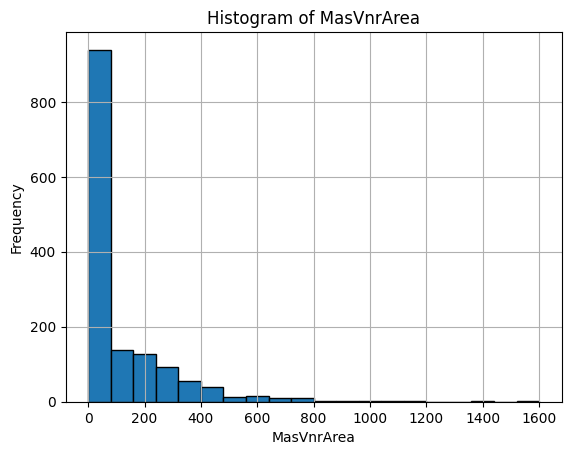

In [1539]:
import matplotlib.pyplot as plt

plt.hist(df_train['MasVnrArea'].dropna(), bins=20, edgecolor='black')
plt.title('Histogram of MasVnrArea')
plt.xlabel('MasVnrArea')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# we will impute this with the most frequent value


In [1540]:
# replace this with the most frequent value MasVnrArea
df_train['MasVnrArea'] = df_train['MasVnrArea'].fillna(df_train['MasVnrArea'].mode()[0])

### Electrical case - categorical

We will see how to treat this missing values

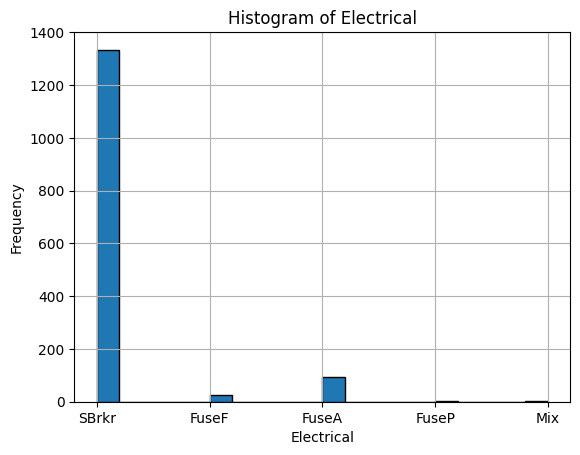

In [1541]:
plt.hist(df_train['Electrical'].dropna(), bins=20, edgecolor='black')
plt.title('Histogram of Electrical')
plt.xlabel('Electrical')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# we will replace this with the most common value

In [1542]:
# replace the NaN values in 'Electrical' with the most frequent value
df_train['Electrical'] = df_train['Electrical'].fillna(df_train['Electrical'].mode()[0])

### GarageYrBlt - case

In [1543]:
# GarageYrBlt change if it has a value to 1 otherwise 0
# df_train['GarageYrBlt'] = df_train['GarageYrBlt'].notna().astype(int)
# count the null values GarageYrBlt
df_train['GarageYrBlt'].isnull().sum()

np.int64(81)

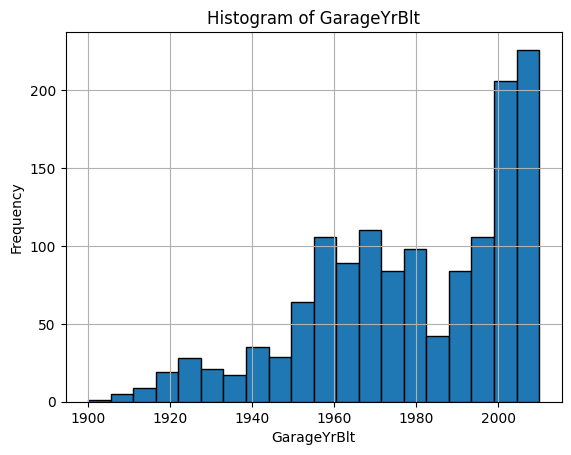

In [1544]:
plt.hist(df_train['GarageYrBlt'], bins=20, edgecolor='black')
plt.title('Histogram of GarageYrBlt')
plt.xlabel('GarageYrBlt')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [1545]:
mode = df_train['GarageYrBlt'].mode()[0]
# replace the NaN values in 'GarageYrBlt' with the most frequent value
df_train['GarageYrBlt'] = df_train['GarageYrBlt'].fillna(mode)

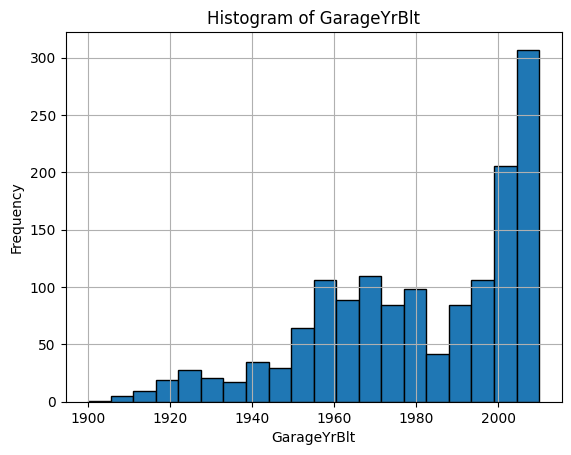

In [1546]:
plt.hist(df_train['GarageYrBlt'], bins=20, edgecolor='black')
plt.title('Histogram of GarageYrBlt')
plt.xlabel('GarageYrBlt')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

---
---
---
---
---

In [1547]:
# do a function for plot a histogram
def plot_histogram(df, column):
    plt.hist(df[column].dropna(), bins=20, edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()





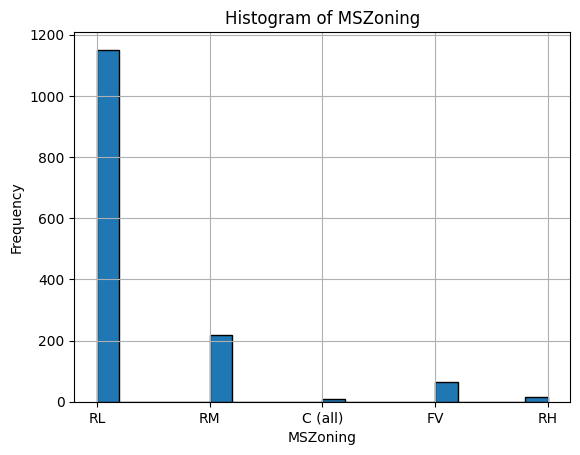

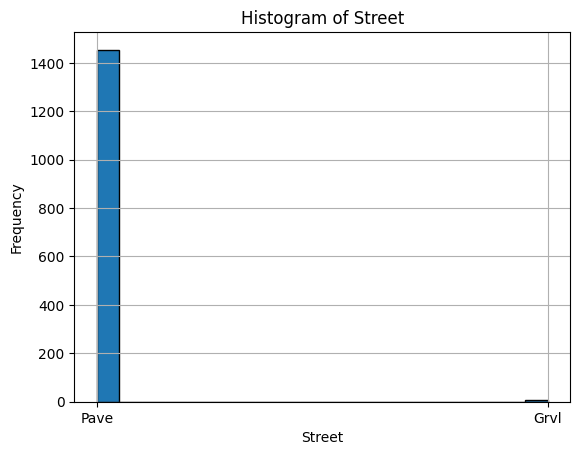

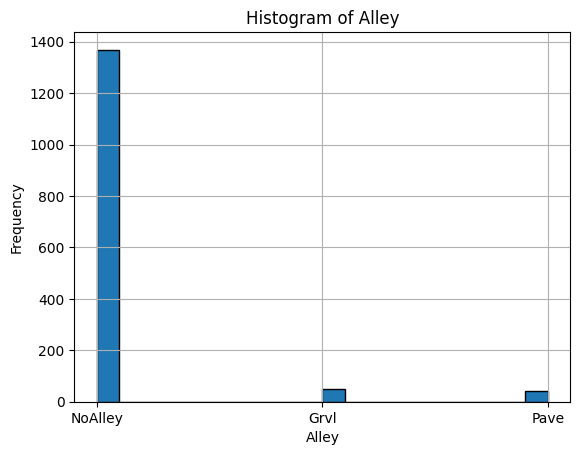

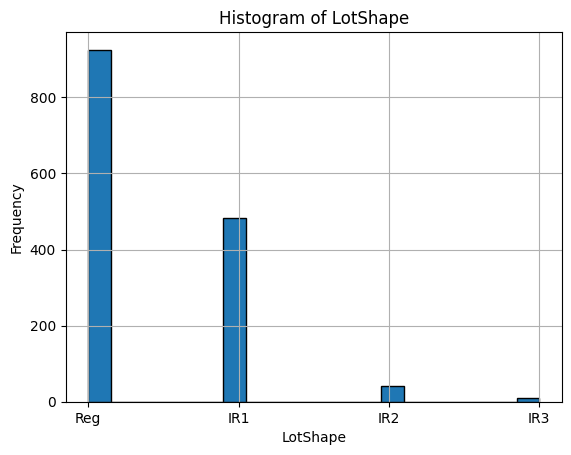

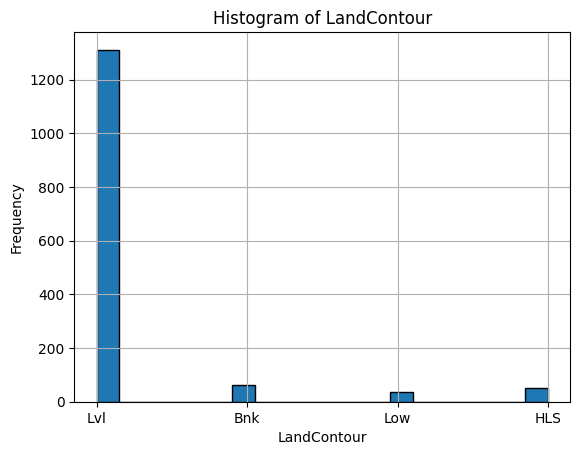

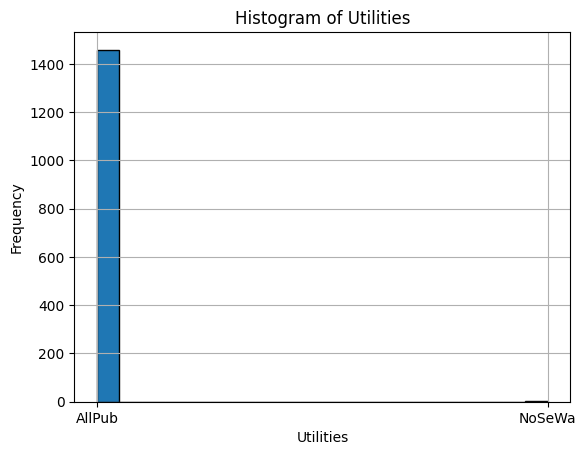

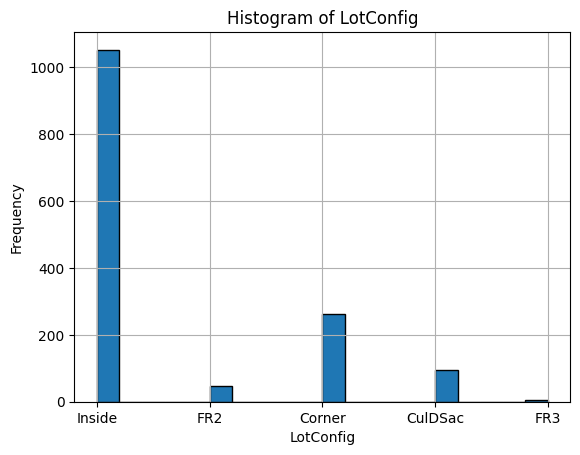

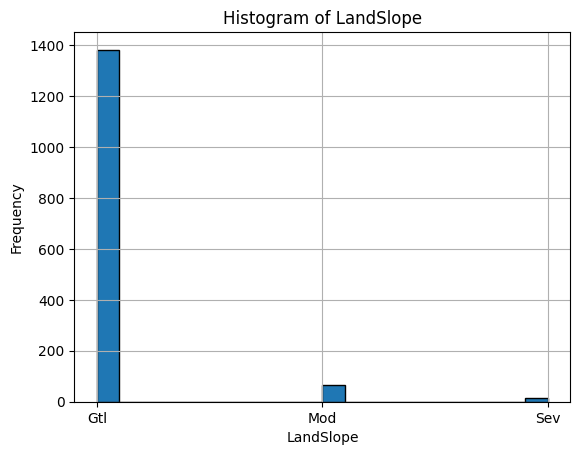

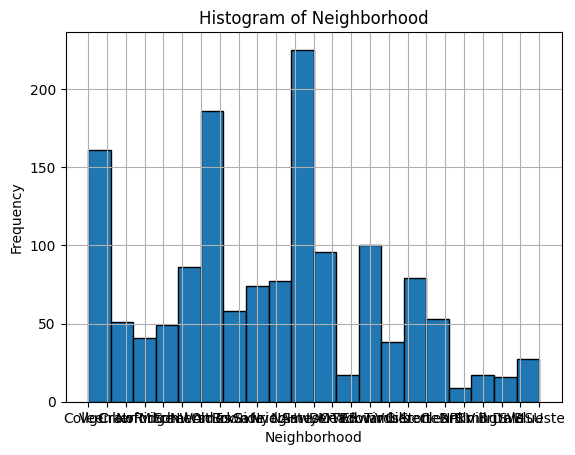

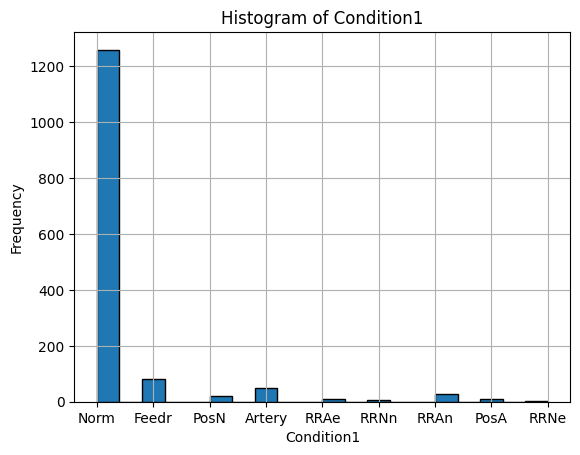

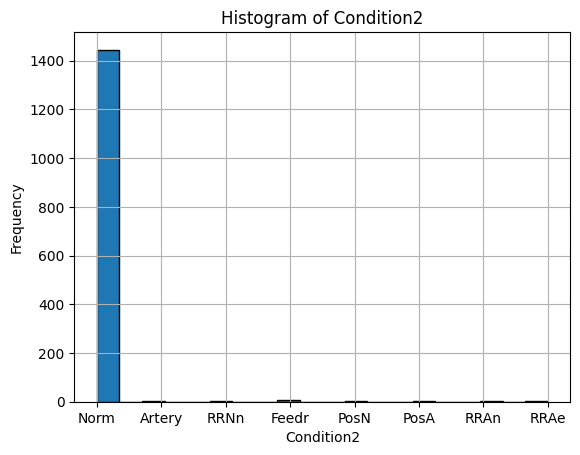

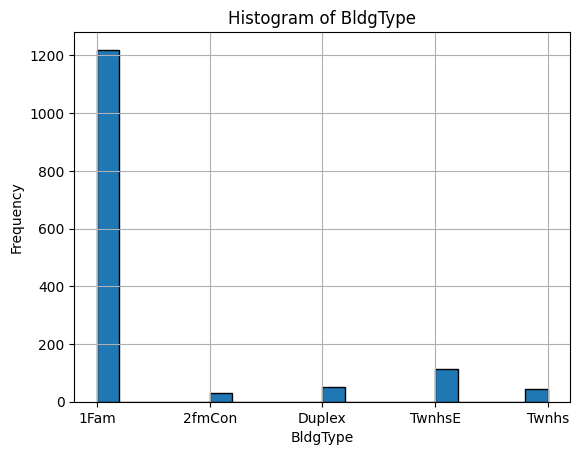

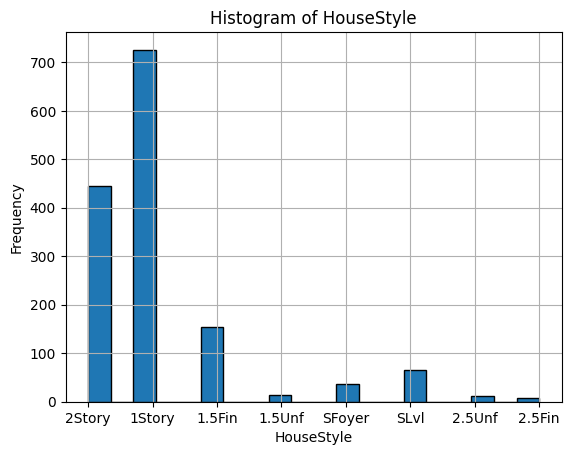

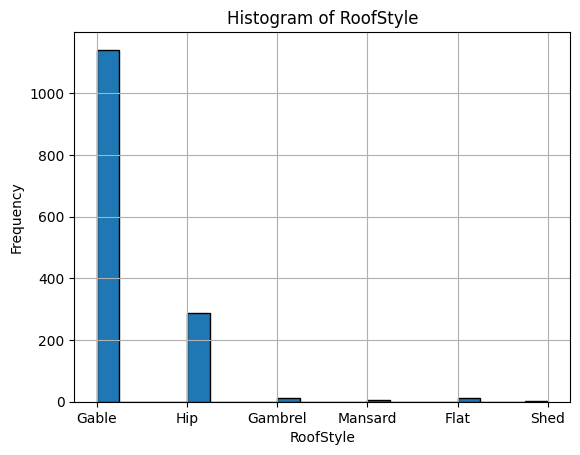

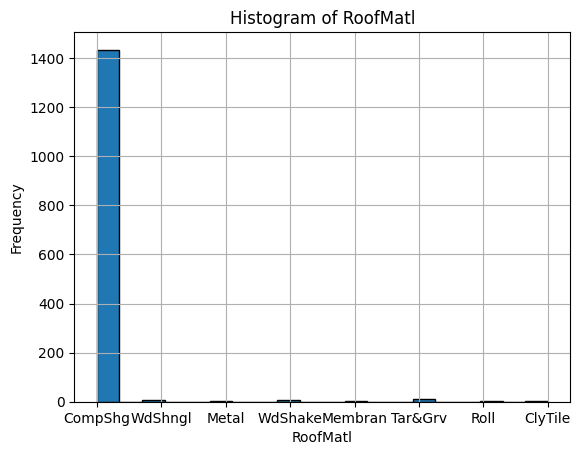

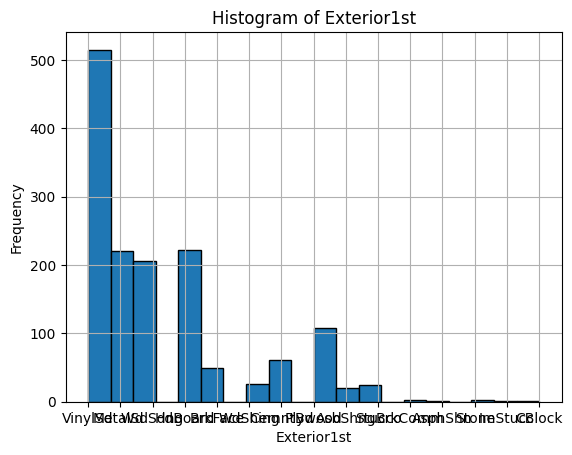

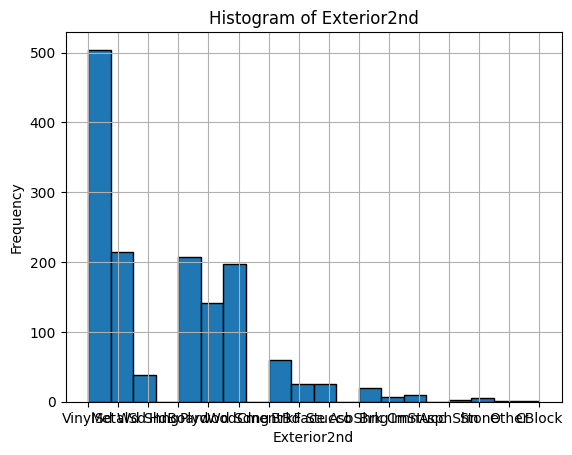

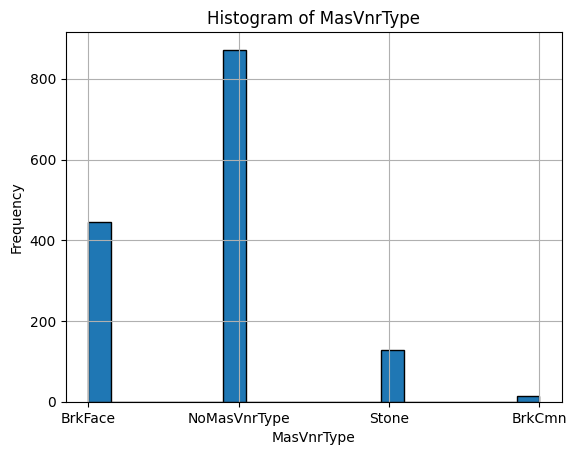

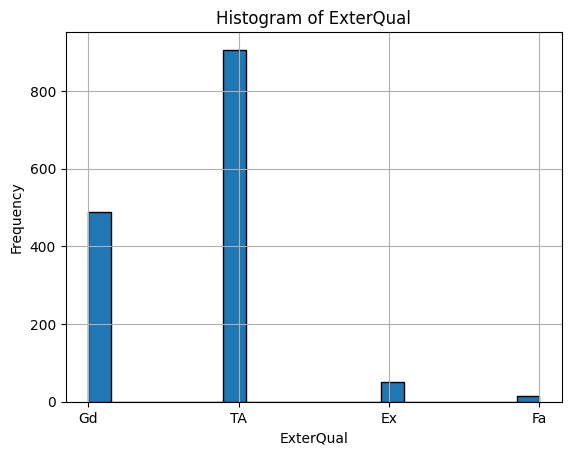

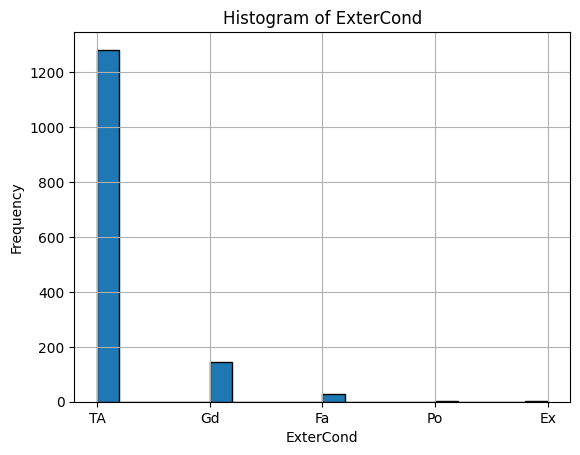

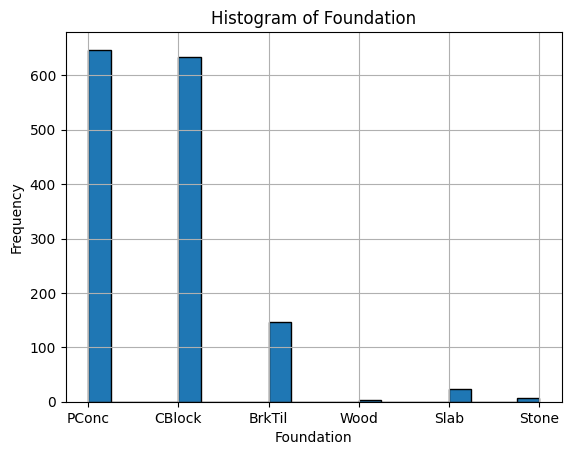

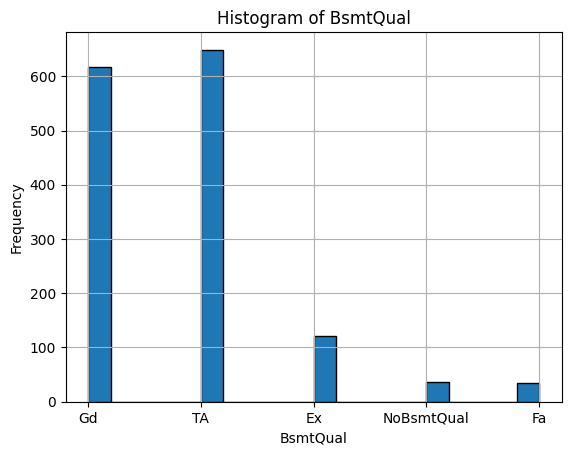

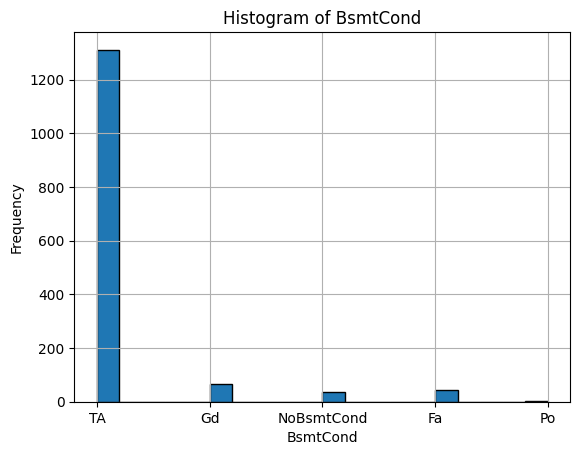

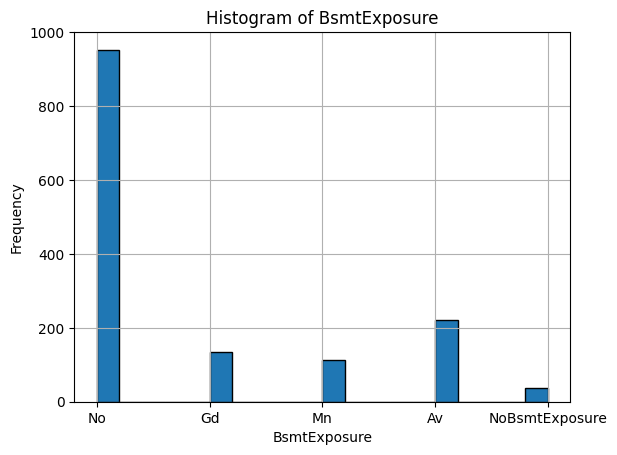

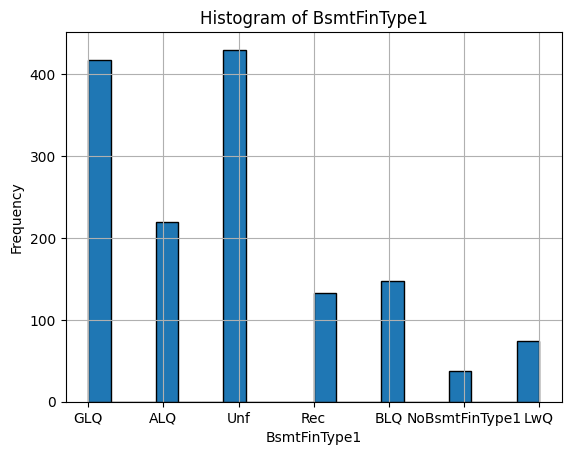

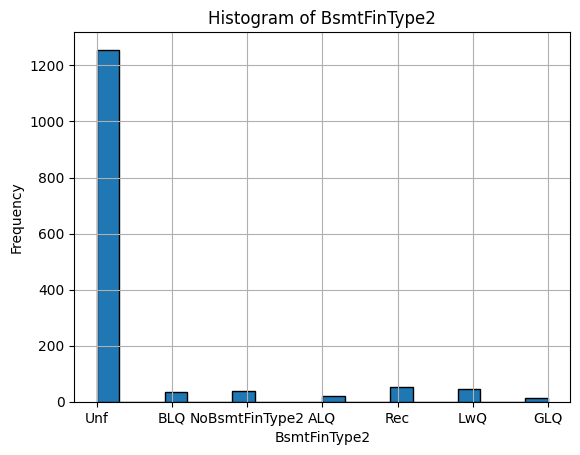

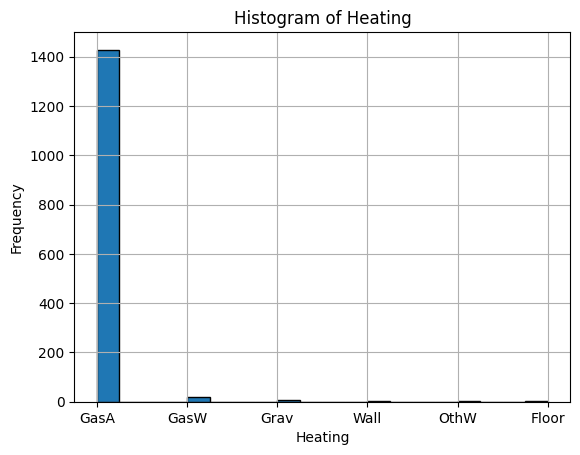

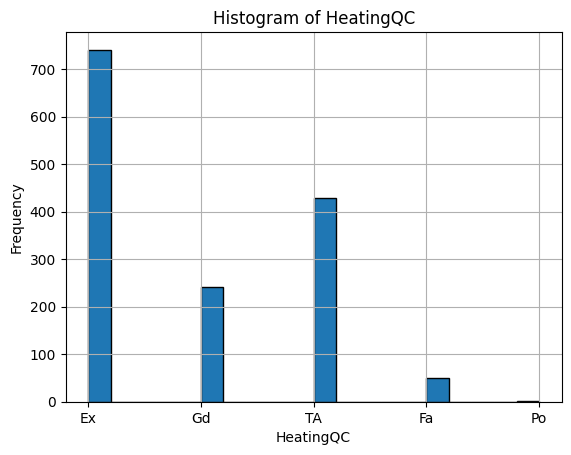

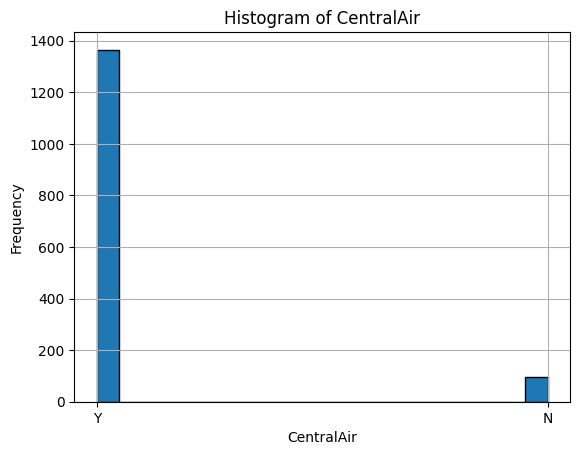

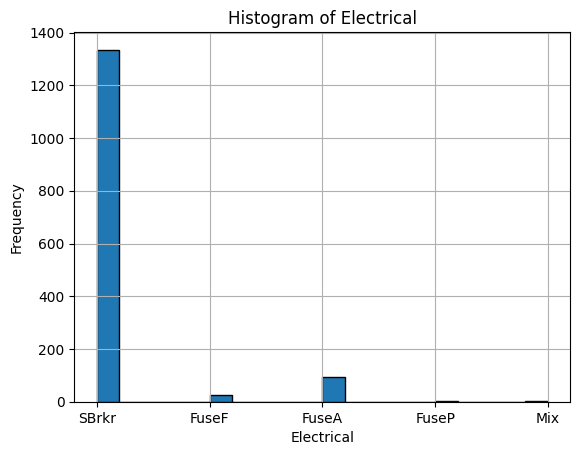

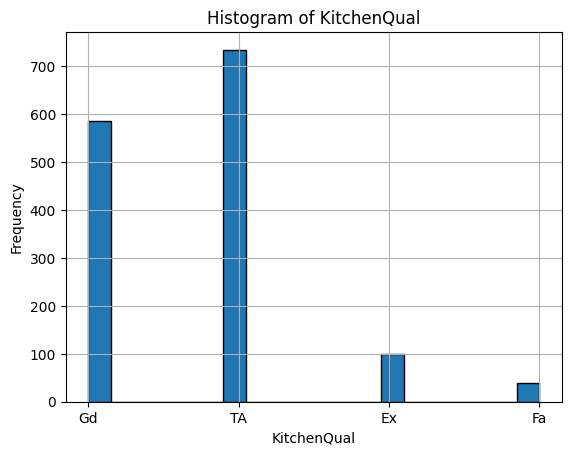

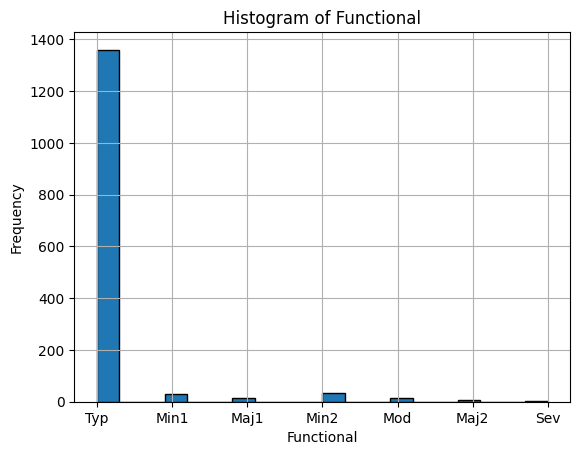

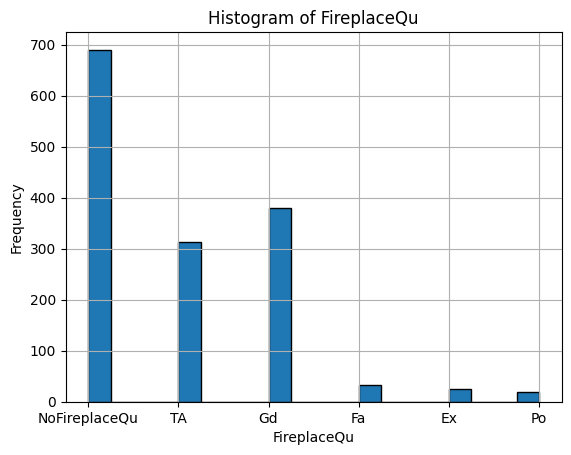

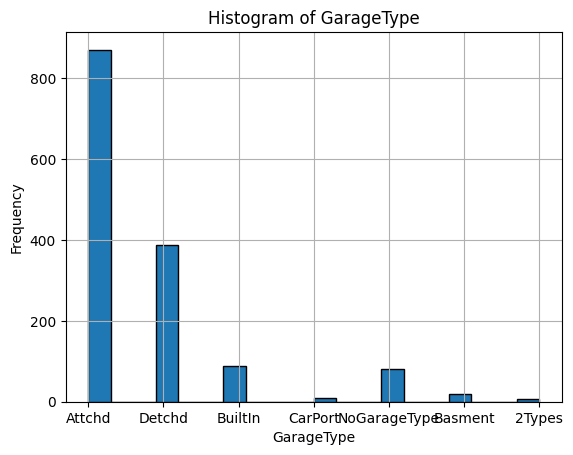

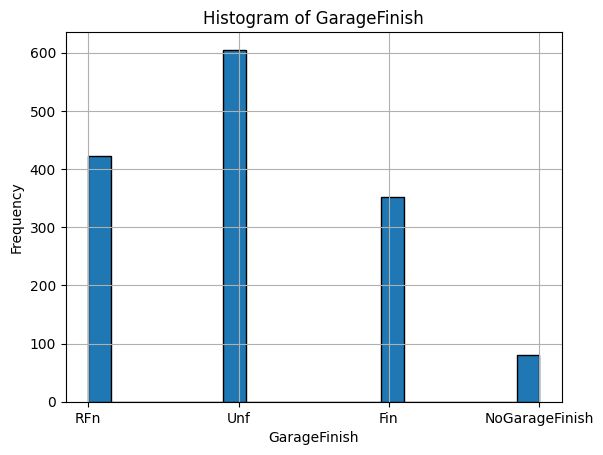

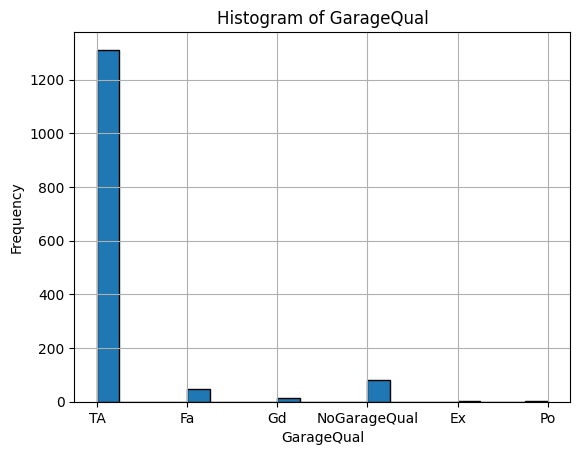

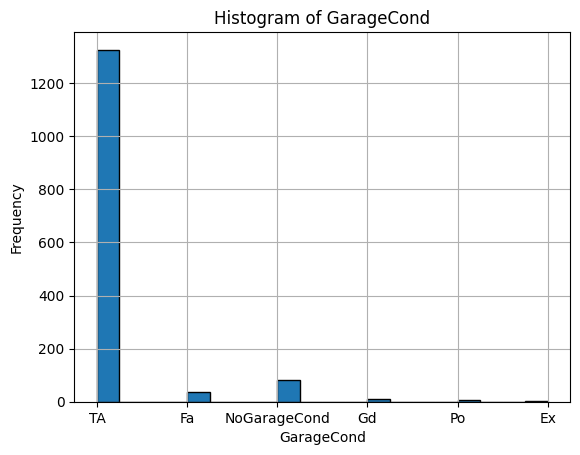

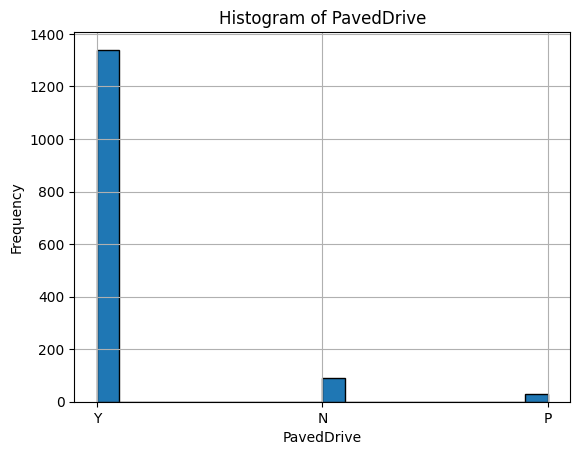

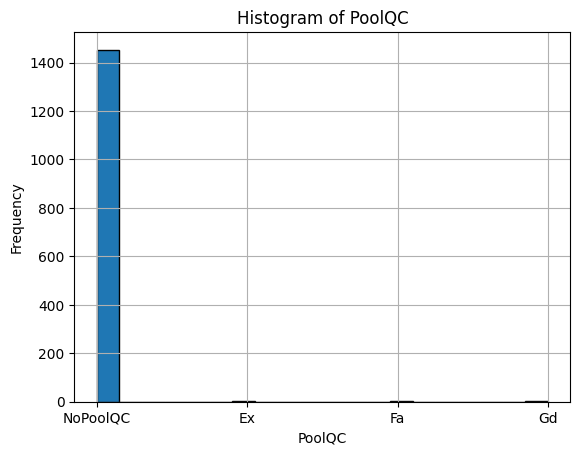

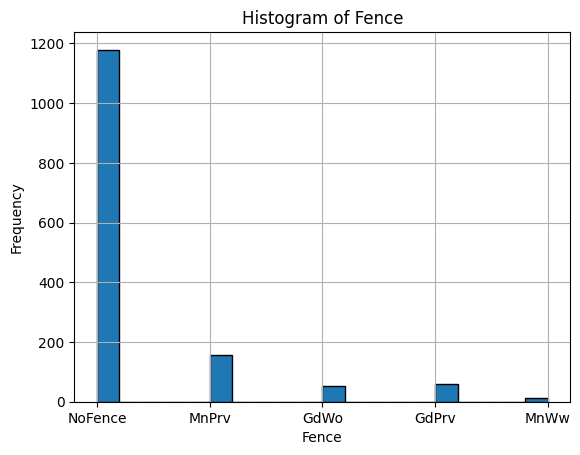

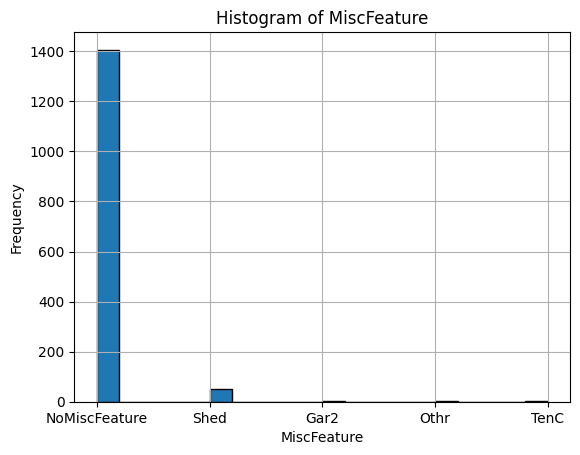

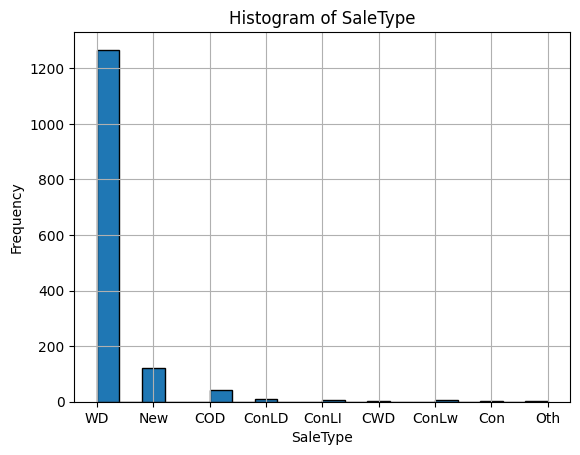

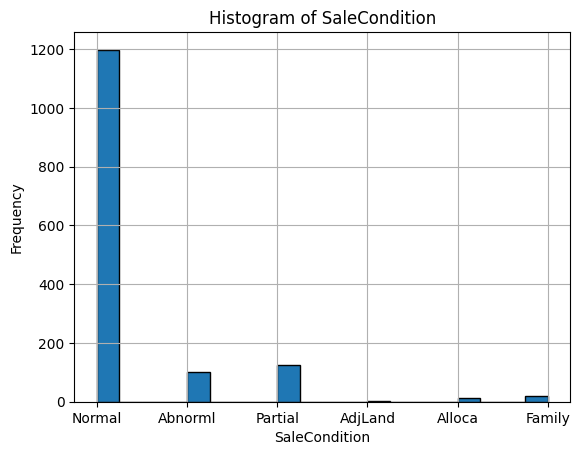

In [1548]:
categorical_columns = df_train.select_dtypes(include=['object']).columns
# Plot histograms for categorical columns
for column in categorical_columns:
    plot_histogram(df_train, column)

We also erase this columns since they have a huge proporcion of just one category than the other ones

In [1549]:
categorical_columns_to_drop =[
    'Street',
    'LandContour', 
    'Utilities',
    'RoofMatl',
    'Heating',
    'Condition2',
    'Functional',
    'BsmtCond',
    'BsmtFinType2',
    'CentralAir',
]

df_train = df_train.drop(columns=categorical_columns_to_drop)
erased_columns = erased_columns + categorical_columns_to_drop

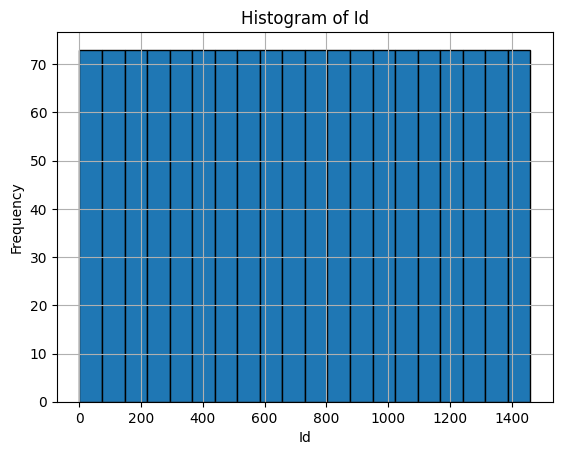

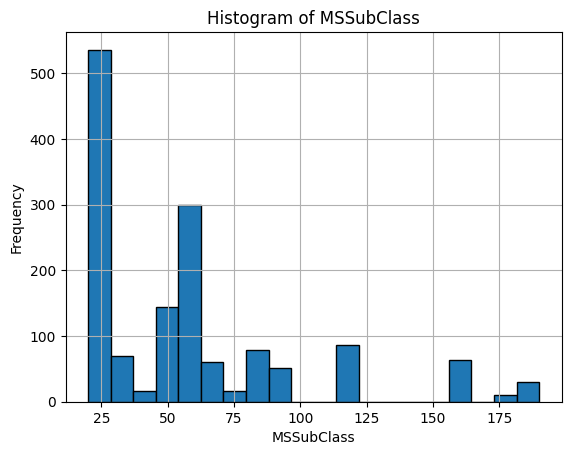

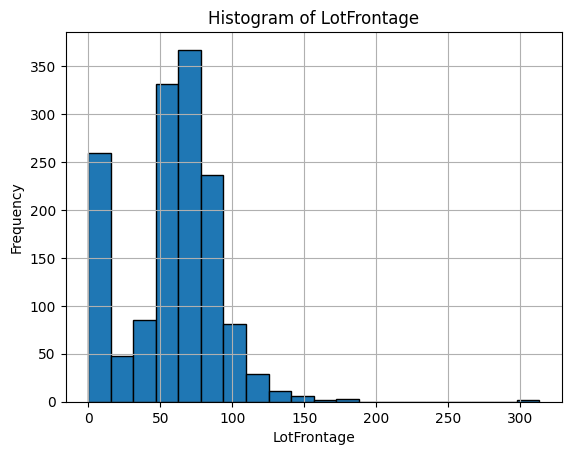

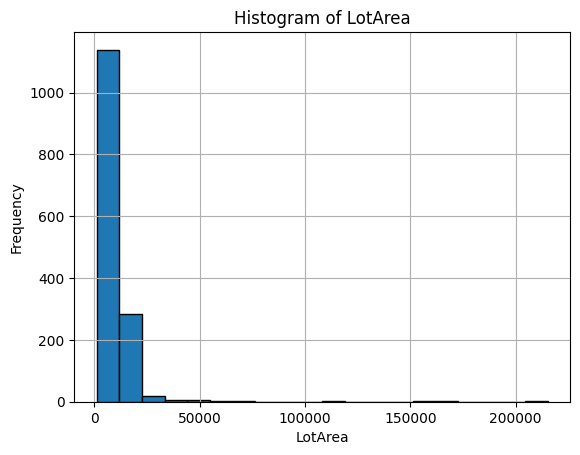

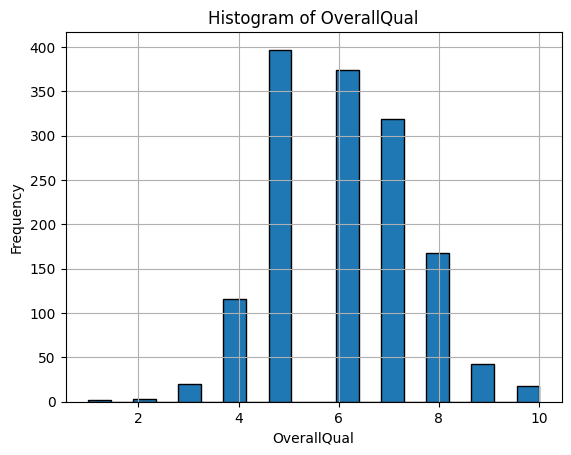

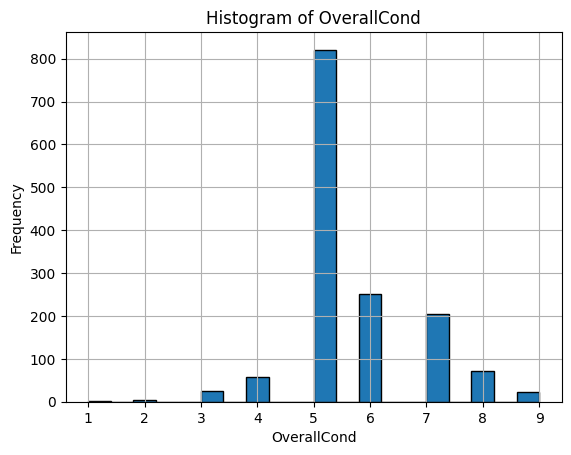

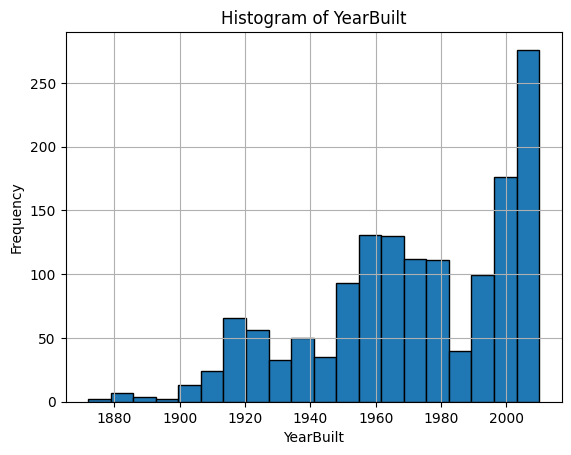

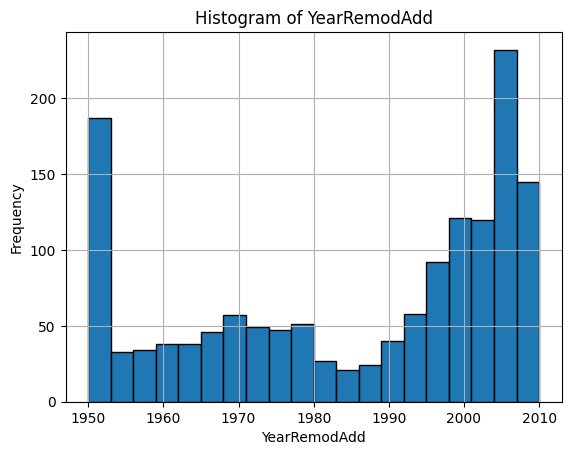

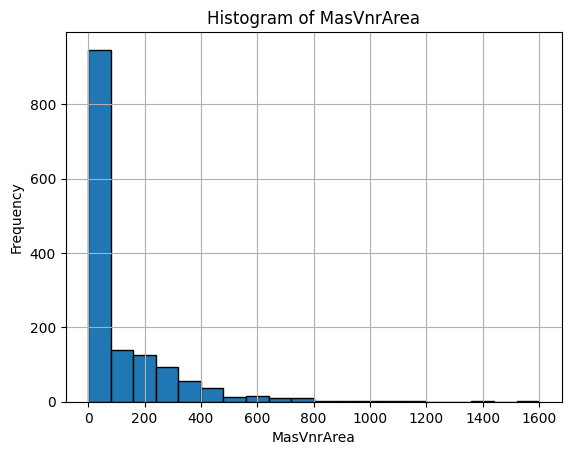

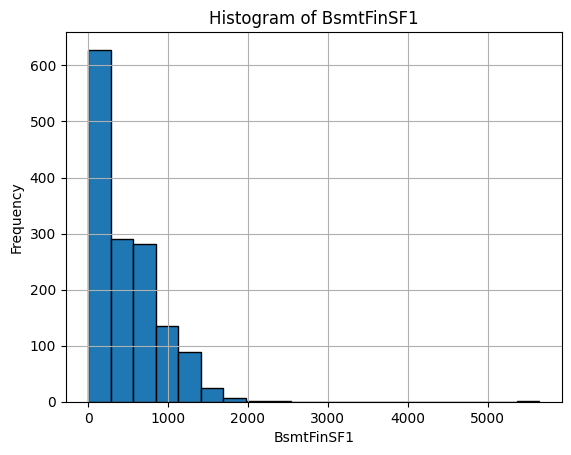

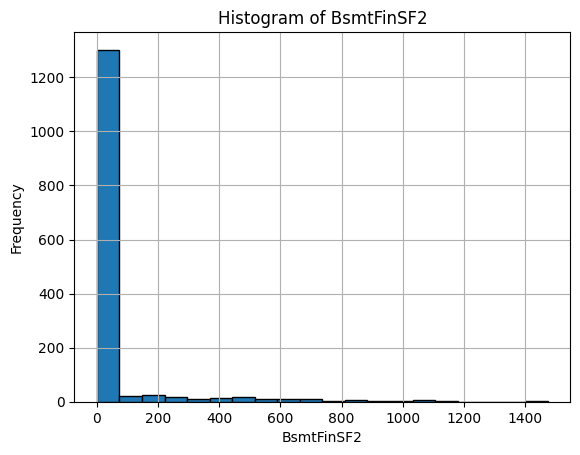

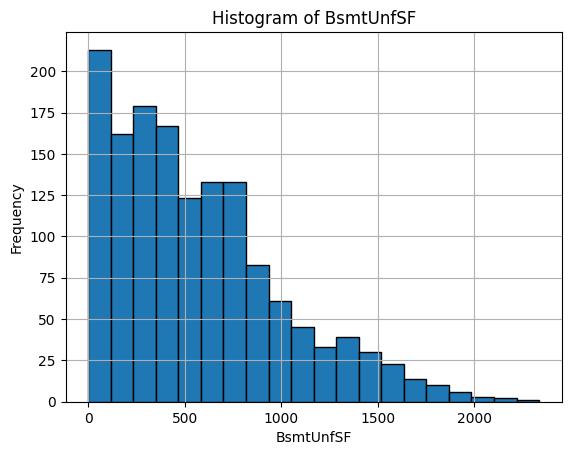

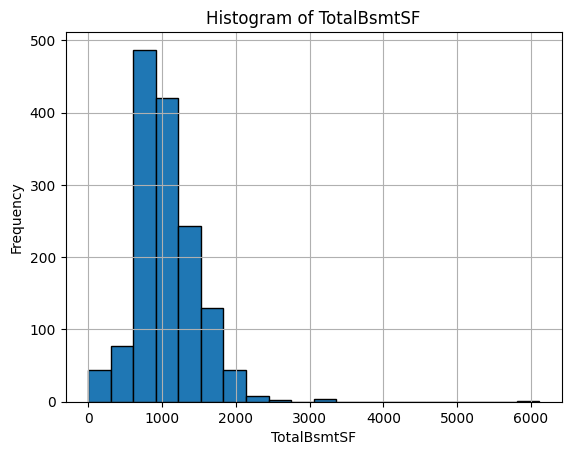

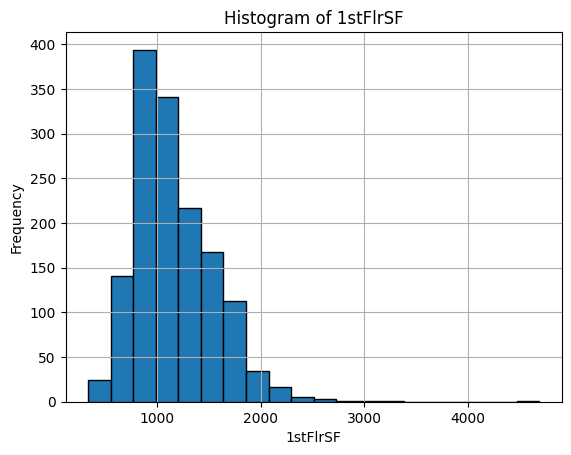

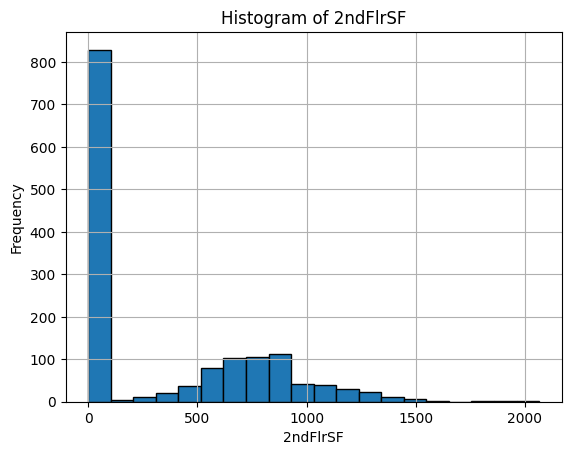

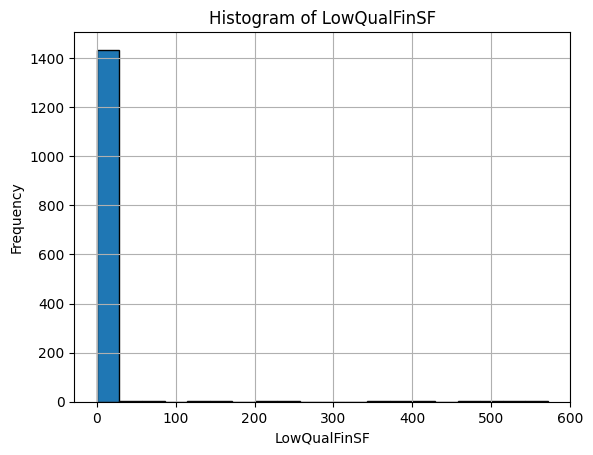

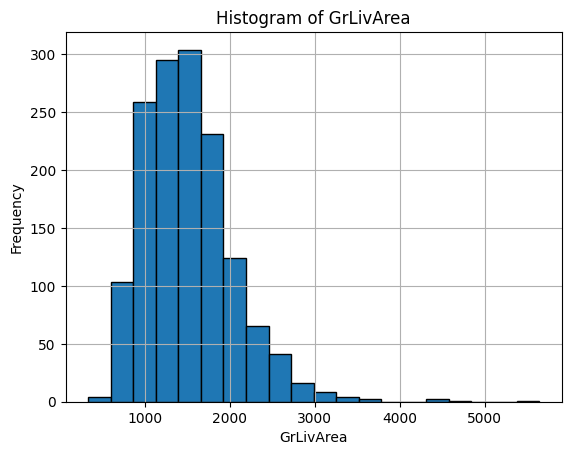

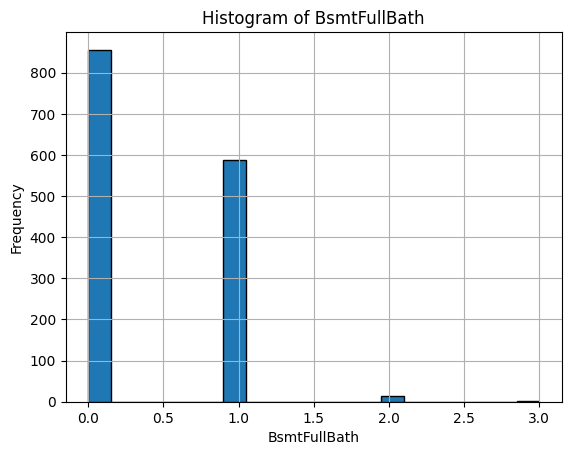

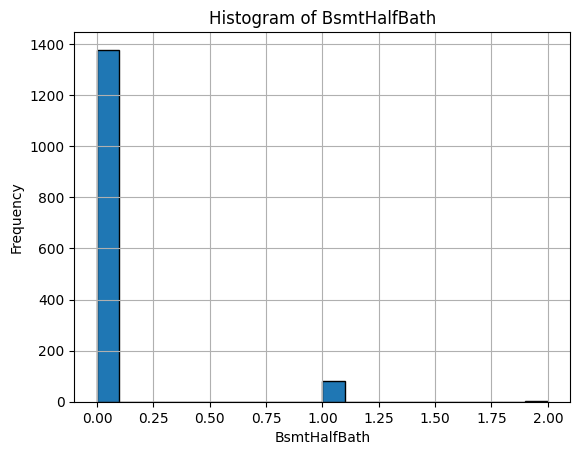

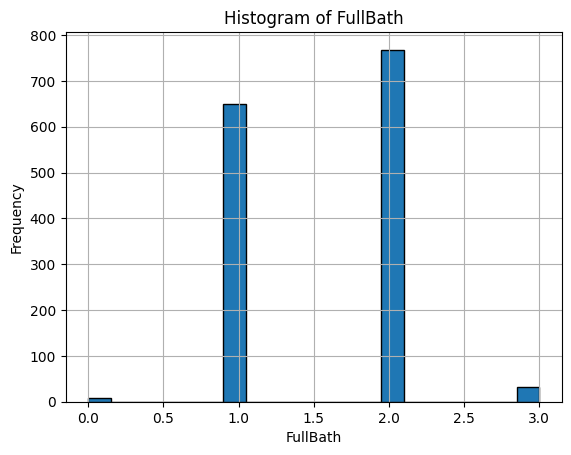

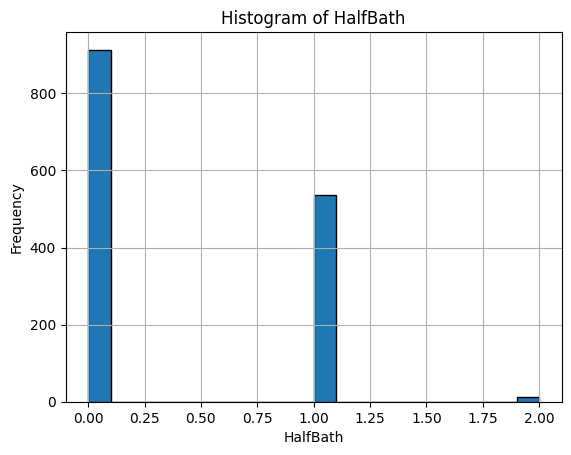

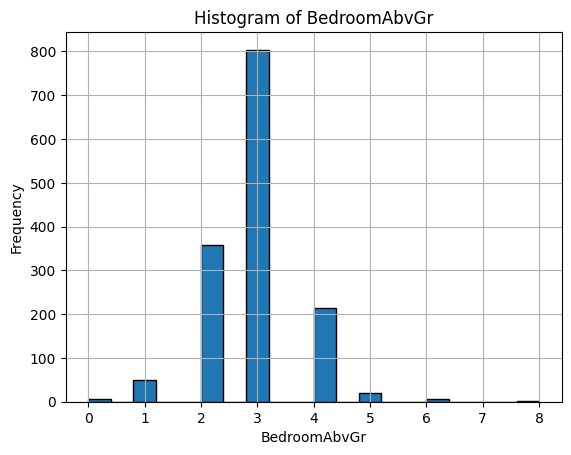

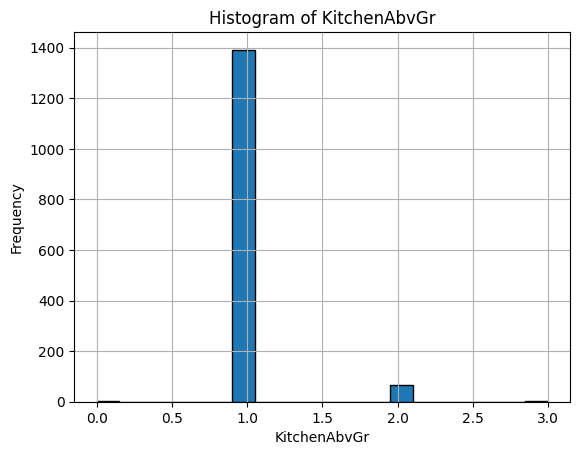

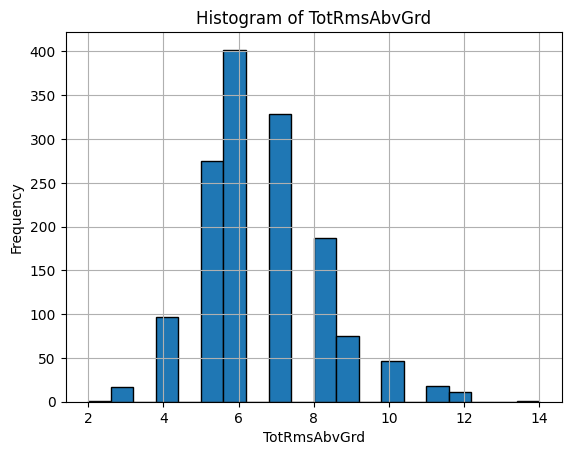

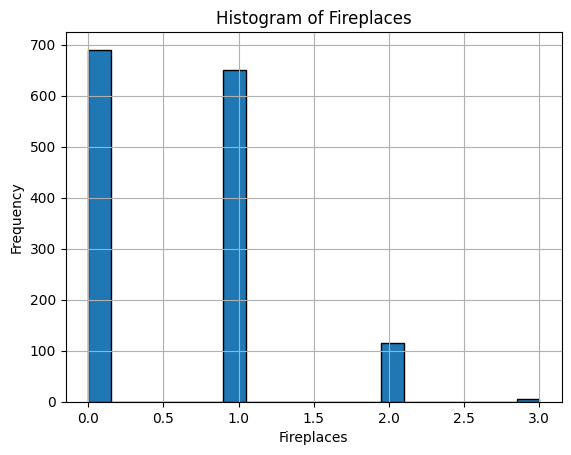

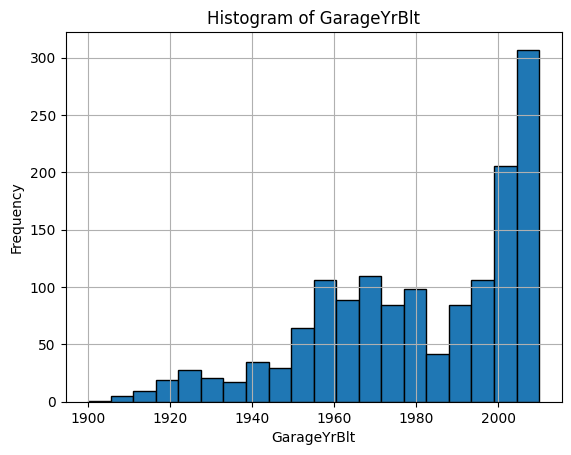

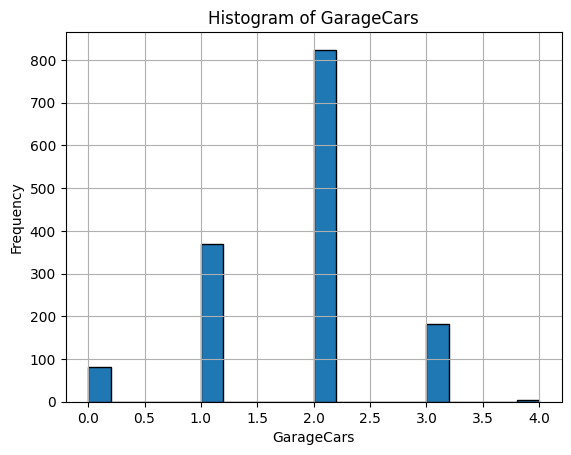

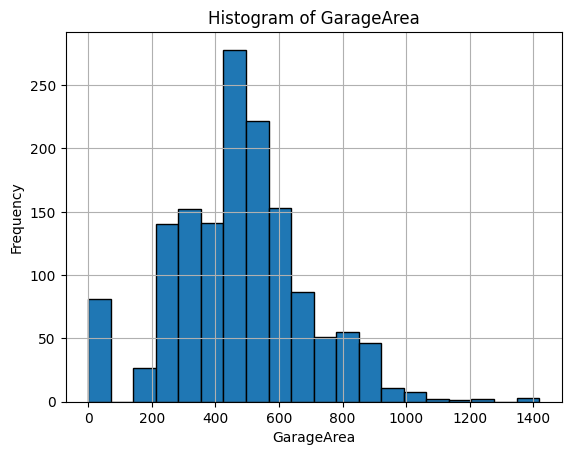

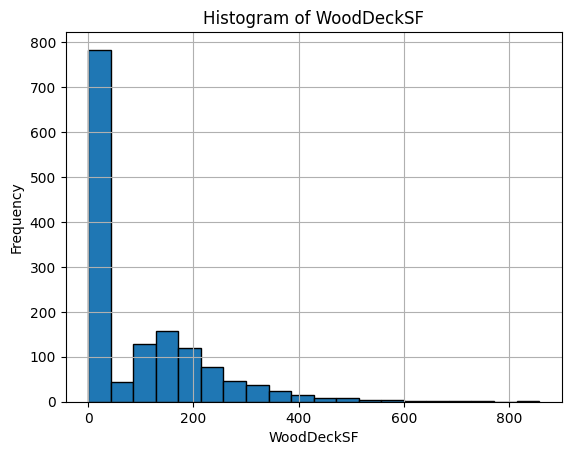

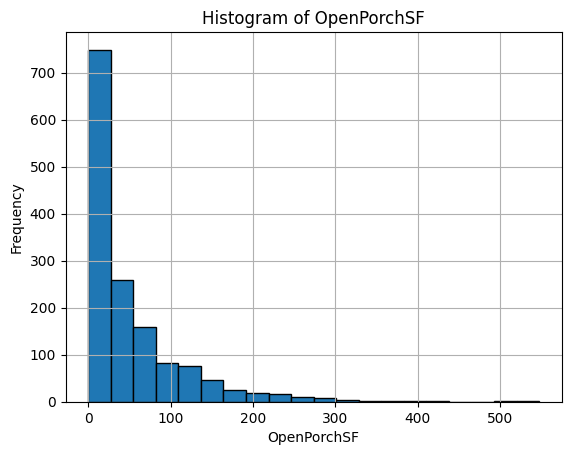

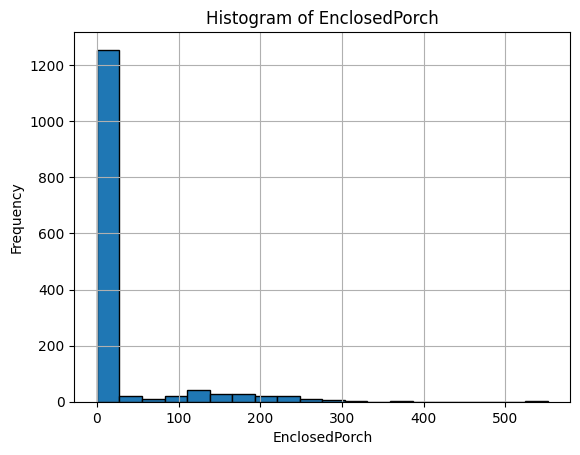

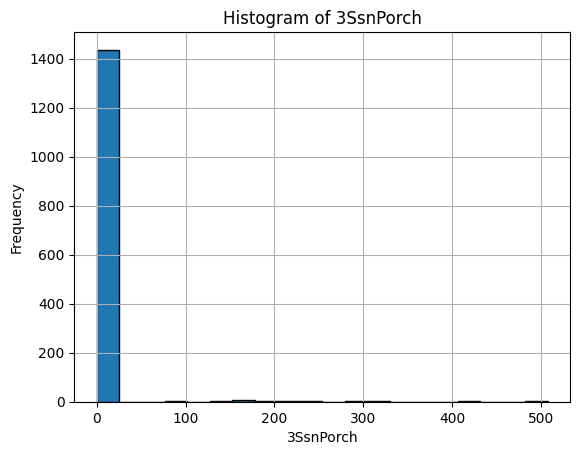

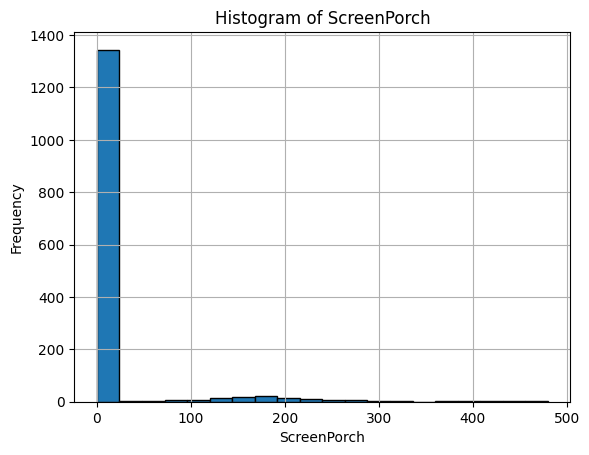

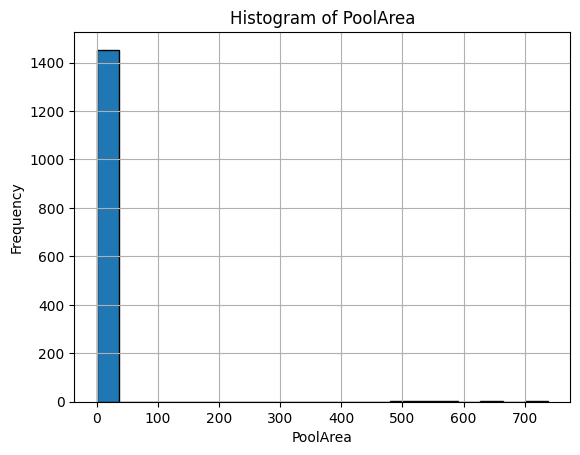

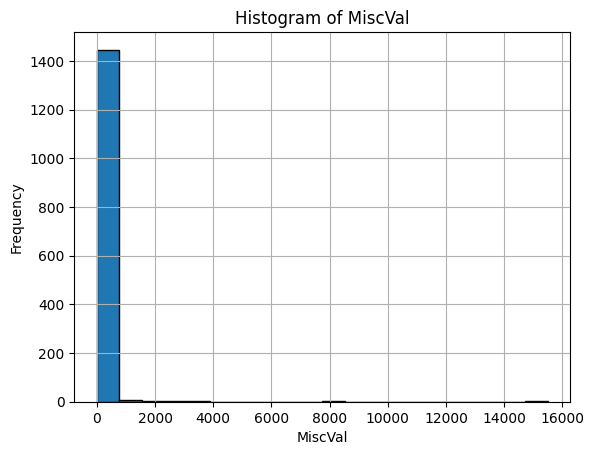

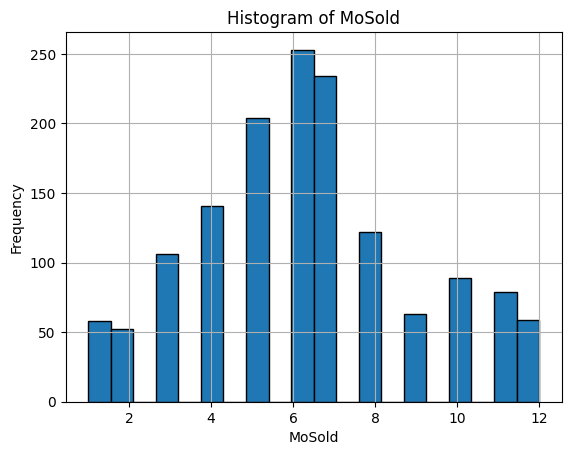

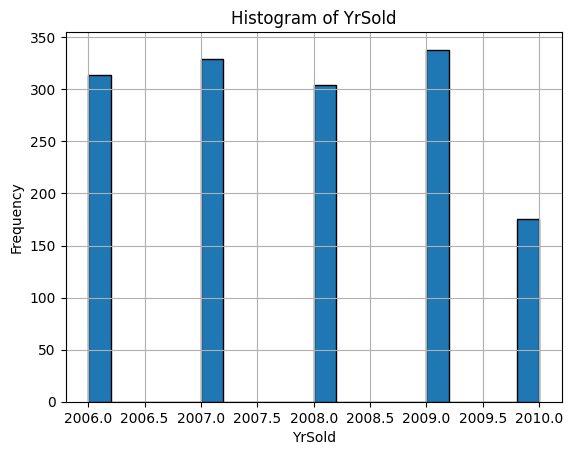

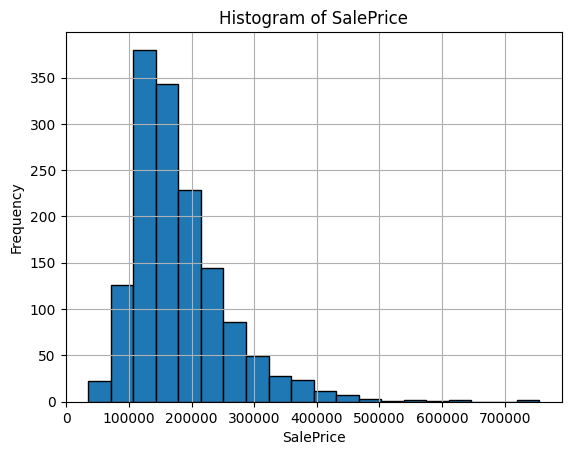

In [1550]:
numeric_columns = df_train.select_dtypes(include=['int64', 'float64']).columns

# Plot histograms for numeric columns
for column in numeric_columns:
    plot_histogram(df_train, column)

After a first look we can see that some hist show us that there are values that are almost contants or that has just two or three values which are very imbalanced, so we will drop the following columns

In [1551]:
numerical_columns_to_drop = [
    'LowQualFinSF',
    'BsmtHalfBath',
    'KitchenAbvGr',
    'EnclosedPorch',
    '3SsnPorch',
    'ScreenPorch',
    'MiscVal',
    'BsmtFinSF2',
    
]

erased_columns = erased_columns + numerical_columns_to_drop

# Drop the specified columns
df_train = df_train.drop(columns=numerical_columns_to_drop)


In [1552]:
erased_columns

['Street',
 'LandContour',
 'Utilities',
 'RoofMatl',
 'Heating',
 'Condition2',
 'Functional',
 'BsmtCond',
 'BsmtFinType2',
 'CentralAir',
 'LowQualFinSF',
 'BsmtHalfBath',
 'KitchenAbvGr',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'MiscVal',
 'BsmtFinSF2']

After analyzing some graphs, we realized that some numeric columns are actually categorical variables represented as numbers, so we will convert them into objects.

In [1553]:
df_train['MSSubClass'].value_counts()

# pass this into a object column
df_train['MSSubClass'] = df_train['MSSubClass'].astype('object')

In [1554]:
df_train['GarageCars'].value_counts()

df_train['GarageCars'] = df_train['GarageCars'].astype('object')

In [1555]:
df_train['MoSold'].value_counts()

df_train['MoSold'] = df_train['MoSold'].astype('object')     

In [1556]:
df_train['Fireplaces'].value_counts()

df_train['Fireplaces'] = df_train['Fireplaces'].astype('object')     

In [1557]:
df_train['YrSold'].value_counts()

df_train['YrSold'] = df_train['YrSold'].astype('object')     

In [1558]:
df_train['TotRmsAbvGrd'].value_counts()

df_train['TotRmsAbvGrd'] = df_train['TotRmsAbvGrd'].astype('object')     

In [1559]:
df_train['BedroomAbvGr'].value_counts()

df_train['BedroomAbvGr'] = df_train['BedroomAbvGr'].astype('object')     

In [1560]:
df_train['HalfBath'].value_counts()

df_train['HalfBath'] = df_train['HalfBath'].astype('object')     

## Multivariate analysis

Let's look at the numeric correlations

In [1561]:
numerical_columns = df_train.select_dtypes(include=['number']).columns.tolist()

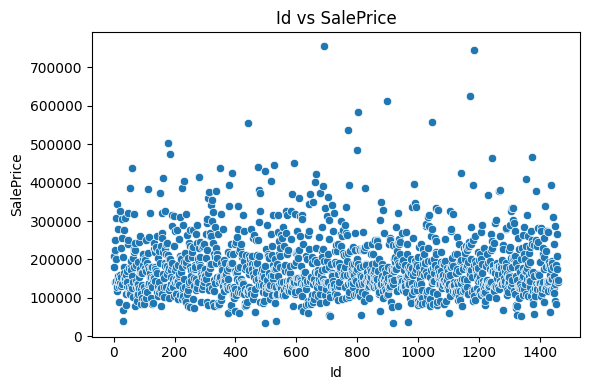

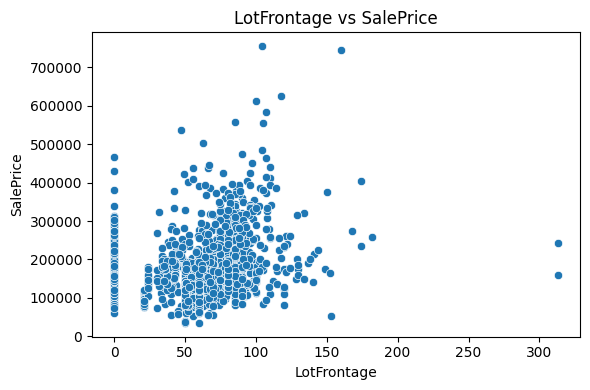

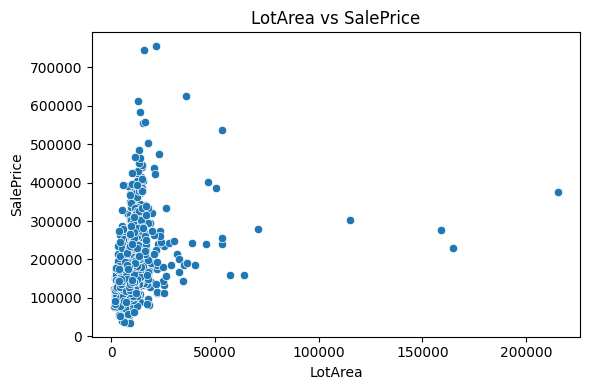

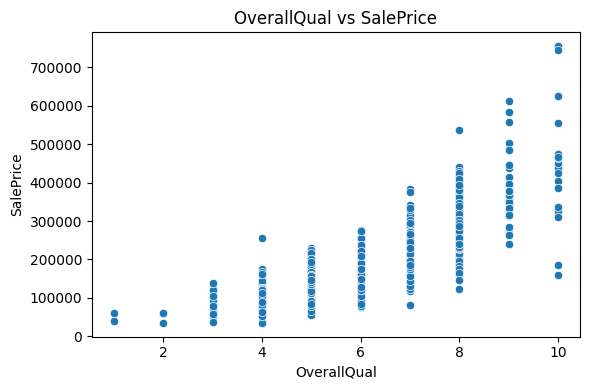

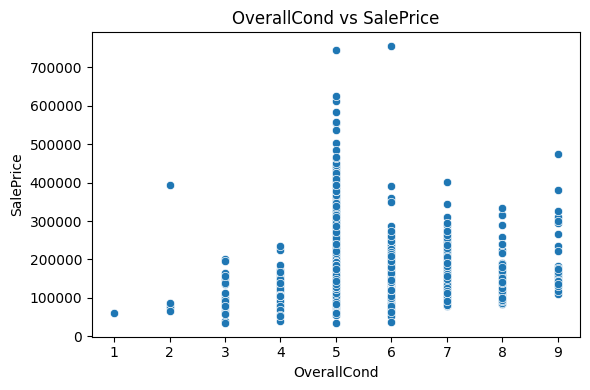

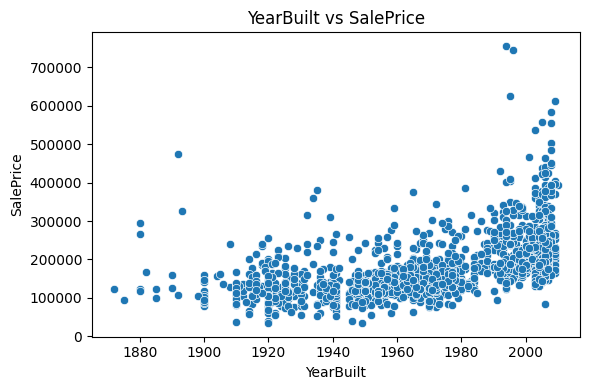

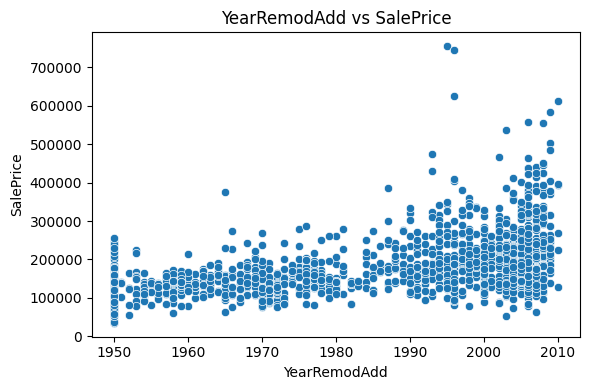

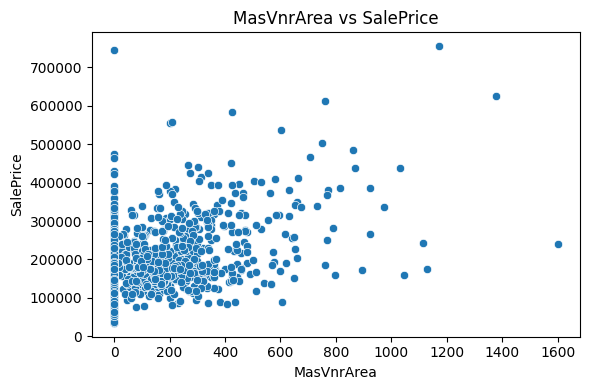

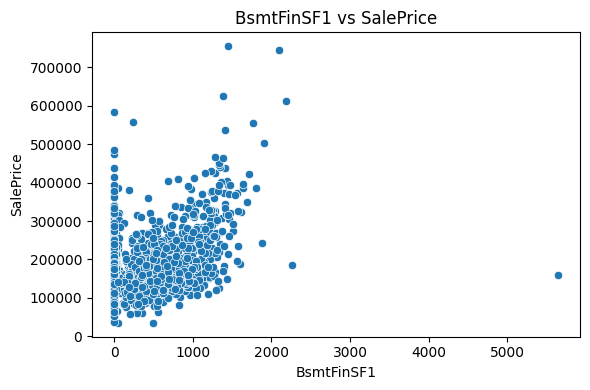

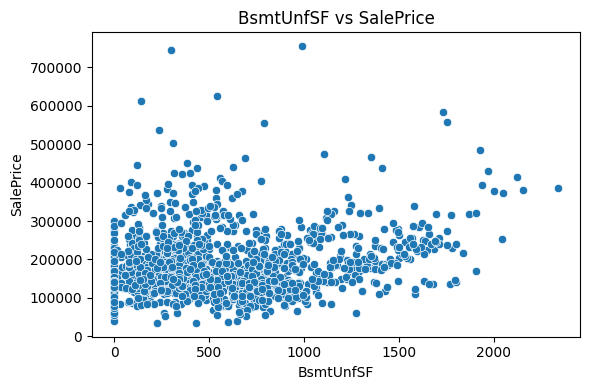

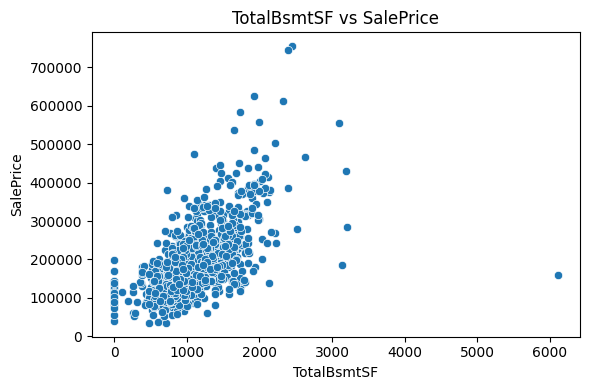

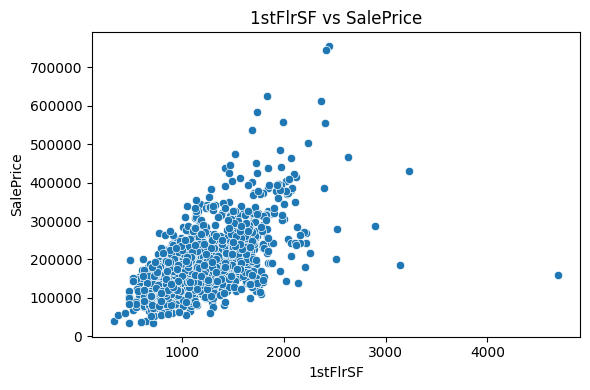

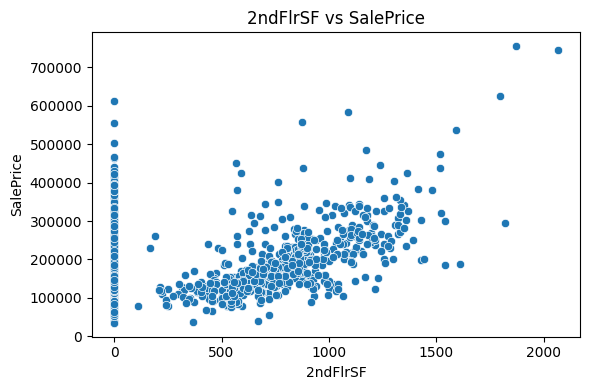

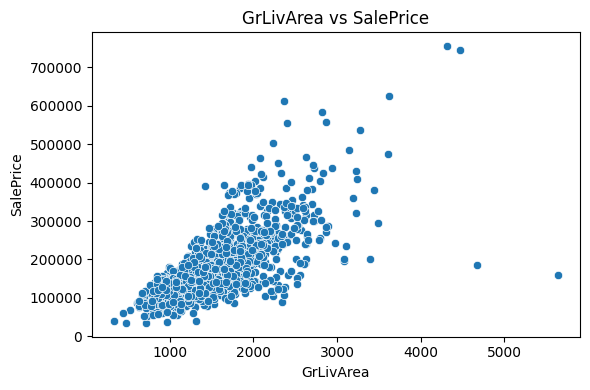

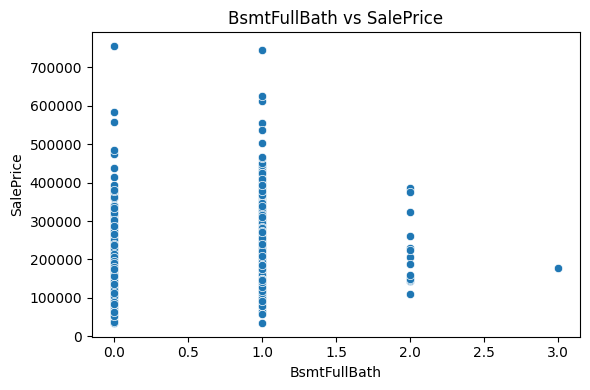

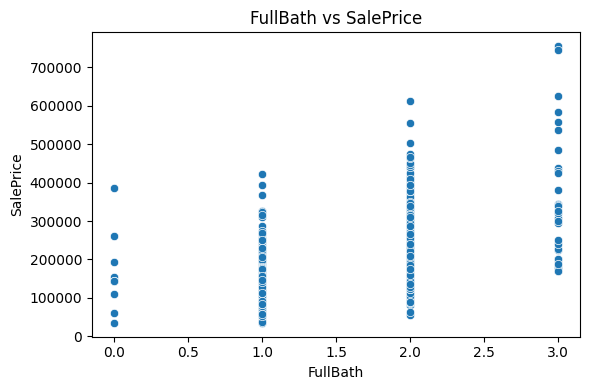

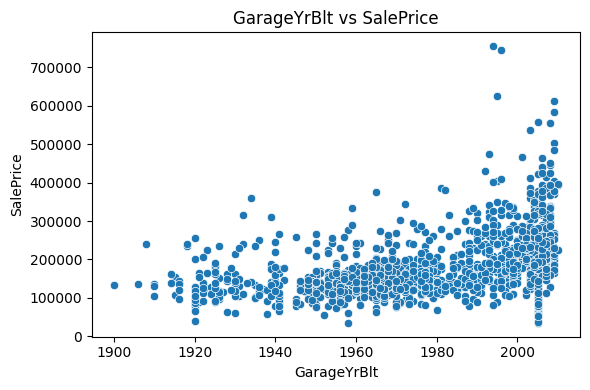

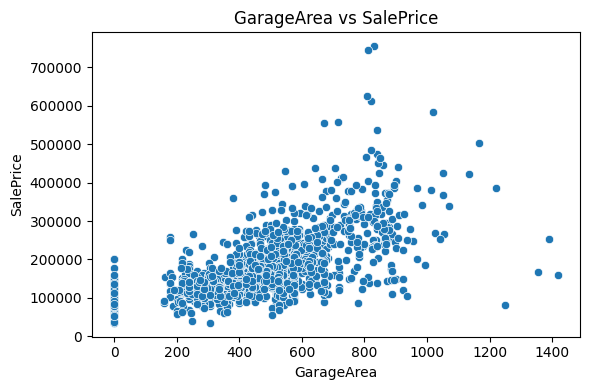

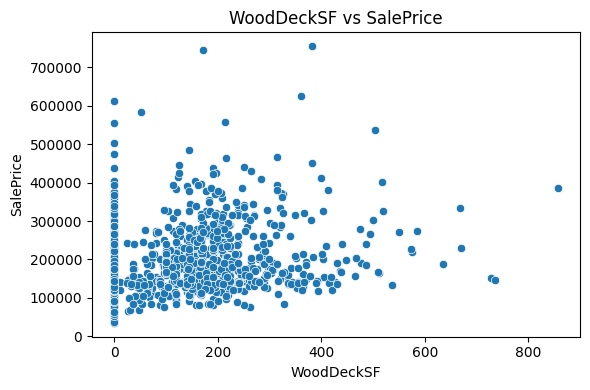

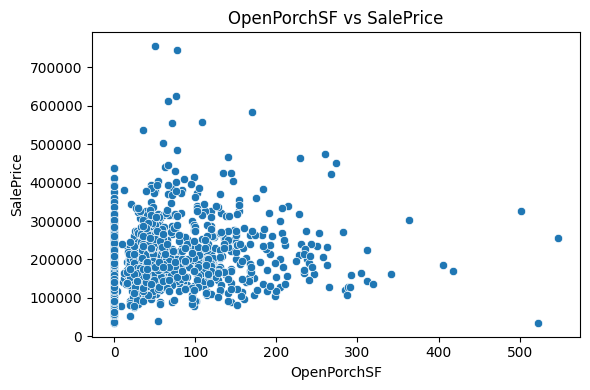

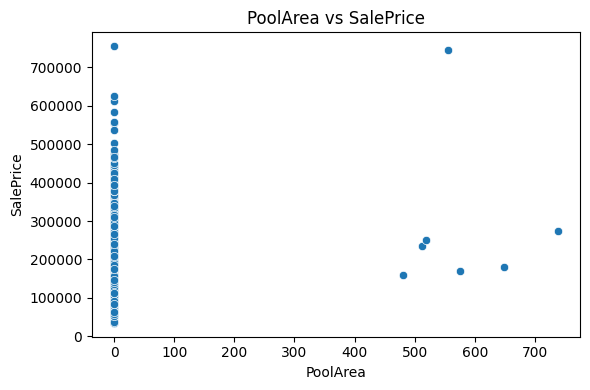

In [1562]:
import seaborn as sns

target_column = 'SalePrice'

# Create scatter plots
for col in numerical_columns:
    if col != target_column:
        plt.figure(figsize=(6, 4))
        sns.scatterplot(data=df_train, x=col, y=target_column)
        plt.title(f"{col} vs {target_column}")
        plt.xlabel(col)
        plt.ylabel(target_column)
        plt.tight_layout()
        plt.show()

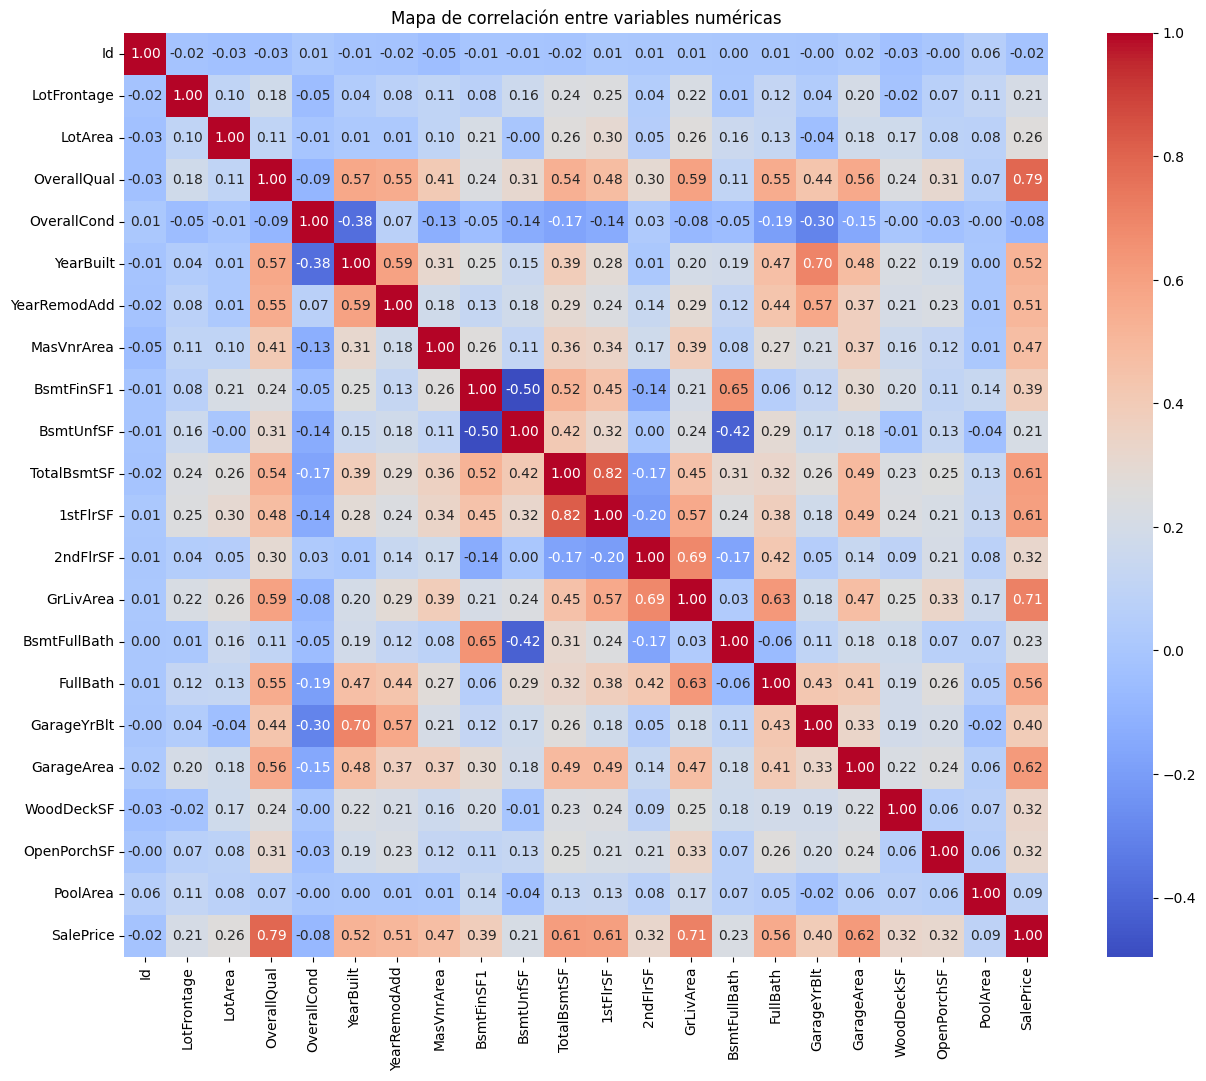

In [1563]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crea un DataFrame solo con las columnas numéricas
numeric_df = df_train.select_dtypes(include=['number'])

# Calcula la matriz de correlación
correlation_matrix = numeric_df.corr()

# Tamaño del gráfico
plt.figure(figsize=(15, 12))

# Mapa de calor de correlaciones
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar=True)

# Título del gráfico
plt.title("Mapa de correlación entre variables numéricas")

# Muestra el gráfico
plt.show()


To improve our linear regression model and reduce multicollinearity, we are applying the following feature selection decisions based on correlation analysis:

- `GarageYrBlt` has a strong correlation (0.70) with `YearBuilt`. Since `YearBuilt` has a stronger correlation with the target variable, we will **drop `GarageYrBlt`**.

- `YearBuilt` and `YearRemodAdd` are correlated (0.59). However, `YearBuilt` has a higher correlation with the target, so we will **drop `YearRemodAdd`**.

- We observed that: BsmtFinSF1 + BsmtFinSF2 + BsmtUnfSF = TotalBsmtSF

Since `TotalBsmtSF` encompasses the other three, we will **drop `BsmtFinSF1`**, **`BsmtFinSF2`**, and **`BsmtUnfSF`** to avoid redundant features.

These decisions aim to simplify the model and improve its predictive performance by removing highly correlated or derived features.


In [1564]:
df_train = df_train.drop(columns=['GarageYrBlt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtUnfSF' ])
erased_columns = erased_columns + ['GarageYrBlt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtUnfSF' ]

In [1565]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 59 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LotConfig      1460 non-null   object 
 8   LandSlope      1460 non-null   object 
 9   Neighborhood   1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  BldgType       1460 non-null   object 
 12  HouseStyle     1460 non-null   object 
 13  OverallQual    1460 non-null   int64  
 14  OverallCond    1460 non-null   int64  
 15  YearBuilt      1460 non-null   int64  
 16  RoofStyle      1460 non-null   object 
 17  Exterior1st    1460 non-null   object 
 18  Exterior

Plotting the categories agains my target

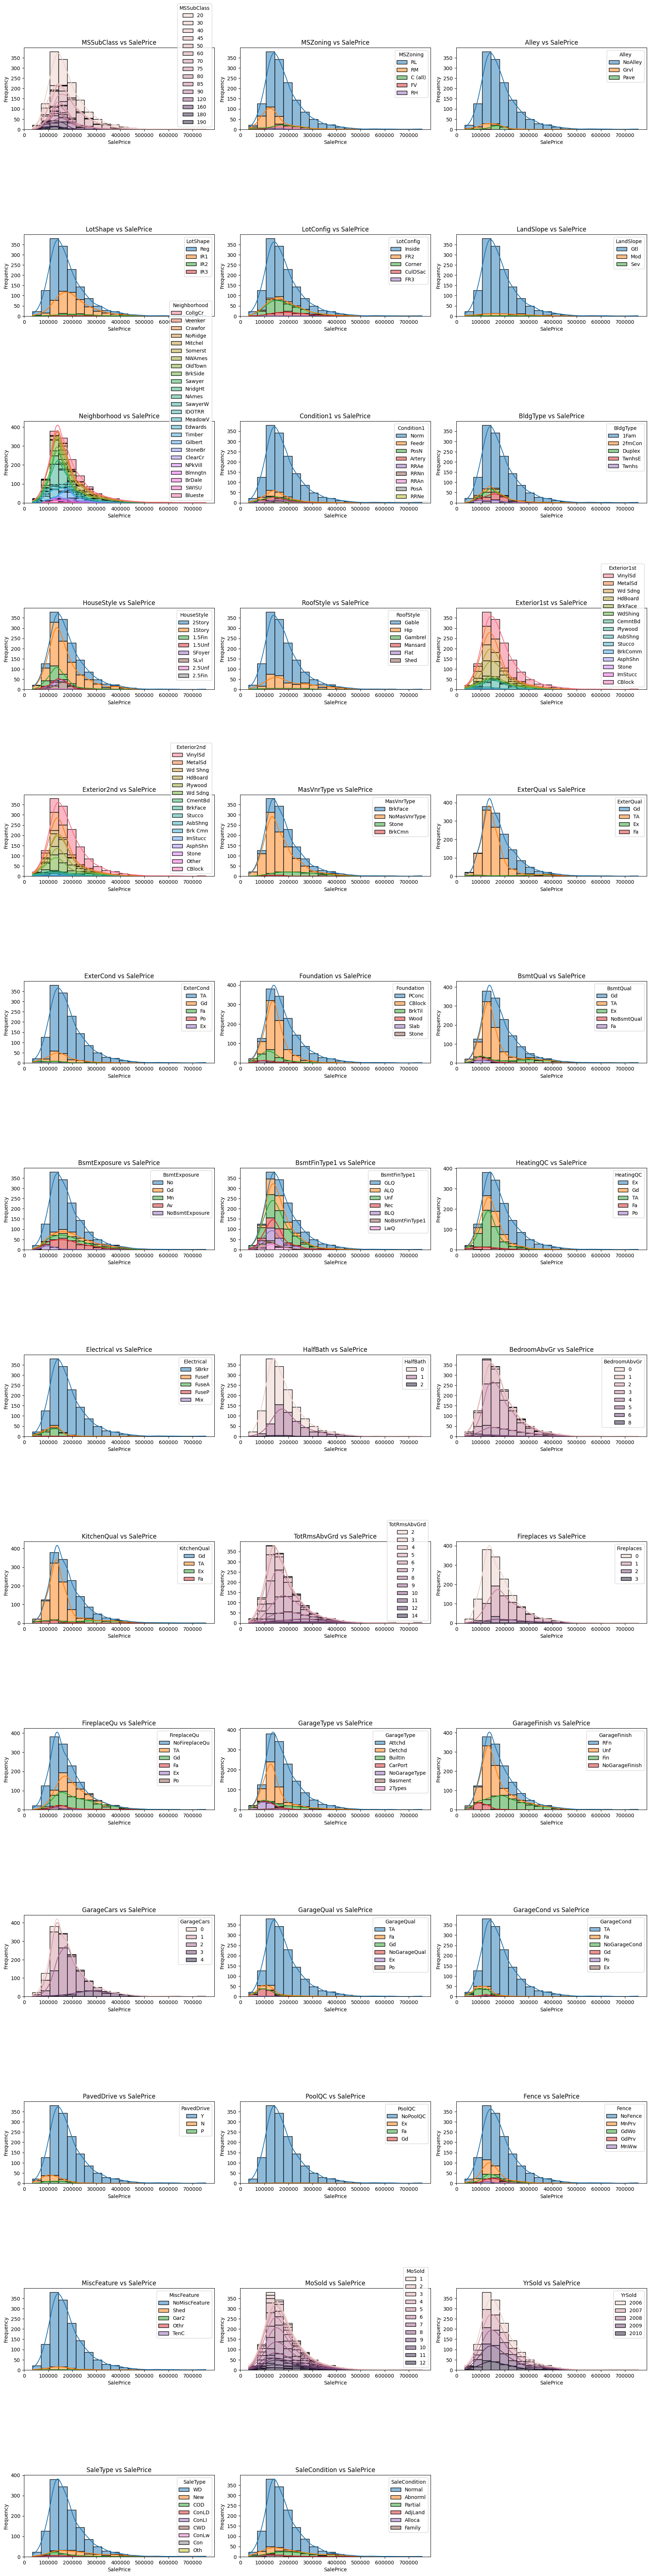

In [1566]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get all categorical columns (dtype 'object')
categorical_cols = df_train.select_dtypes(include='object').columns

# Set up the plot grid
n_cols = 3
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols
plt.figure(figsize=(n_cols * 6, n_rows * 5))

# Loop through each categorical column
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    
    # Plot histograms for SalePrice grouped by category in blue
    sns.histplot(data=df_train, x='SalePrice', hue=col, kde=True, multiple="stack", color="blue", bins=20)
    
    plt.title(f'{col} vs SalePrice')
    plt.xlabel('SalePrice')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


## Training Models

In [1567]:
# create a df called metrics with a name_model column and r2_score column and rmse column
metrics = pd.DataFrame(columns=['name_model', 'r2_score', 'rmse', 'log-rmse'])


In [1568]:
# split the data into train and test
from sklearn.model_selection import train_test_split

X = df_train.drop(columns=['SalePrice'])
y = df_train['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

X_train = X_train.drop(columns=['Id'])

In [1598]:
print(type(y_train))  # should be <class 'pandas.core.series.Series'>


<class 'pandas.core.series.Series'>


In [1569]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

According to the graphs bar since there is one predominant category in RL and less in other categories, we will select just if it's RL or not

In [1570]:
from sklearn.base import BaseEstimator, TransformerMixin

class MSZoningBinaryTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        X['MSZoning'] = (X['MSZoning'] == 'RL').astype(int)
        return X


In [1571]:
class SaleCondBinaryTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        X['SaleCondition'] = (X['SaleCondition'] == 'Normal').astype(int)
        return X

In [1572]:
class SaleTypeBinaryTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        X['SaleType'] = (X['SaleType'] == 'WD').astype(int)
        return X

In [1573]:
class PavedDriveBinaryTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        X['PavedDrive'] = (X['PavedDrive'] == 'Y').astype(int)
        return X

In [1574]:
class GarageTypeBinaryTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        X['GarageType'] = (X['GarageType'] == 'Attchd').astype(int)
        return X

In [1575]:
class FunctionalBinaryTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        X['Functional'] = (X['Functional'] == 'Typ').astype(int)
        return X

In [1576]:
class ElectricalBinaryTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        X['Electrical'] = (X['Electrical'] == 'SBrkr').astype(int)
        return X

In [1577]:
class Heatingransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X = X.copy()
        X['Heating'] = (X['Heating'] == 'GasA').astype(int)
        return X

In [1578]:
class ExterCondBinaryTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        X['ExterCond'] = (X['ExterCond'] == 'TA').astype(int)
        return X

In [1579]:
class BsmtExposureBinaryTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        X['BsmtExposure'] = (X['BsmtExposure'] == 'No').astype(int)
        return X

In [1580]:
class HalfBathBinaryTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        X['HalfBath'] = (X['HalfBath'] == 0).astype(int)
        return X

In [1581]:
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np
import pandas as pd

class NeighborhoodCardinalPosition(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.neighborhood_map = {
            'Bloomington Heights': "N",   # Blmngtn
            'Bluestem': "S",              # Blueste
            'Briardale': "N",             # BrDale
            'Brookside': "S",             # BrkSide
            'Clear Creek': "W",           # ClearCr
            'College Creek': "W",        # CollgCr
            'Crawford': "E",              # Crawfor
            'Edwards': "W",               # Edwards
            'Gilbert': "E",               # Gilbert
            'Greens': "S",                # Greens
            'Green Hills': "S",           # GrnHill
            'Iowa DOT and Rail Road': "S",# IDOTRR
            'Landmark': "S",              # Landmrk
            'Meadow Village': "S",        # MeadowV
            'Mitchell': "S",              # Mitchel
            'North Ames': "N",            # NAmes
            'Northridge': "N",            # NoRidge
            'Northpark Villa': "N",       # NPkVill
            'Northridge Heights': "N",    # NridgHt
            'Northwest Ames': "N",        # NWAmes
            'Old Town': "E",              # OldTown
            'SWISU': "W",                 # SWISU
            'Sawyer': "W",                # Sawyer
            'Sawyer West': "W",           # SawyerW
            'Somerset': "N",              # Somerst
            'Stone Brook': "N",           # StoneBr
            'Timberland': "S",            # Timber
            'Veenker': "N",               # Veenker
        }

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Convert to Series for mapping
        X_series = pd.Series(X.ravel())
        # Map neighborhoods to cardinal directions
        X_mapped = X_series.map(self.neighborhood_map)
        # Assign 'Unknown' to any unmapped or missing values
        X_mapped = X_mapped.fillna('Unknown')
        return X_mapped.to_numpy().reshape(-1, 1)


In [1582]:
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np

class BsmtFinSF2BinaryTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        # Convert to binary (0/1) and then to strings ('0'/'1')
        X['BsmtFinSF2'] = np.where(X['BsmtFinSF2'] == 0, '0', '1').astype(object)
        return X

In [1583]:
from sklearn.base import BaseEstimator, TransformerMixin

class SecondFloorBinaryTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        X['2ndFlrSF'] = (X['2ndFlrSF'] != 0).astype(object)
        return X


In [1584]:
from sklearn.base import BaseEstimator, TransformerMixin

class AlleyMissingValueImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        X['Alley'] = X['Alley'].fillna('NoAlley')
        return X


In [1585]:
from sklearn.base import BaseEstimator, TransformerMixin

class PoolQCFiller(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        X['PoolQC'] = X['PoolQC'].fillna('NoPool')
        return X


In [1586]:
from sklearn.base import BaseEstimator, TransformerMixin

class MiscFeatureImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        X['MiscFeature'] = X['MiscFeature'].fillna('NoMiscFeature')
        return X


In [1587]:
X_train.head(10)

MSSubClass MSZoning  LotFrontage  LotArea    Alley LotShape LotConfig  \
254          20       RL         70.0     8400  NoAlley      Reg    Inside   
1066         60       RL         59.0     7837  NoAlley      IR1    Inside   
638          30       RL         67.0     8777  NoAlley      Reg    Inside   
799          50       RL         60.0     7200  NoAlley      Reg    Corner   
380          50       RL         50.0     5000     Pave      Reg    Inside   
303          20       RL         70.0     9800  NoAlley      Reg    Corner   
86           60       RL        122.0    11911  NoAlley      IR2    Inside   
1385         50       RM         40.0     5436  NoAlley      Reg    Inside   
265          20       RL         78.0    12090  NoAlley      IR1    Inside   
793          20       RL         76.0     9158  NoAlley      Reg    Inside   

     LandSlope Neighborhood Condition1  ... WoodDeckSF OpenPorchSF  PoolArea  \
254        Gtl        NAmes       Norm  ...        250           0         0   
1066       Gtl      Gilbert       Norm  ...          0          40         0   
638        Gtl      Edwards      Feedr  ...        328           0         0   
799        Gtl        SWISU      Feedr  ...          0           0         0   
380        Gtl        SWISU       Norm  ...          0           0         0   
303        Gtl      CollgCr       Norm  ...        256           0         0   
86         Gtl      Gilbert       Norm  ...        100          38         0   
1385       Gtl       IDOTRR       Norm  ...          0          96         0   
265        Gtl       NWAmes       Norm  ...        276           0         0   
793        Gtl      Somerst       Norm  ...        168         130         0   

        PoolQC    Fence    MiscFeature MoSold YrSold SaleType  SaleCondition  
254   NoPoolQC  NoFence  NoMiscFeature      6   2010       WD         Normal  
1066  NoPoolQC  NoFence  NoMiscFeature      5   2009       WD         Normal  
638   NoPoolQC    MnPrv  NoMiscFeature      5   2008       WD         Normal  
799   NoPoolQC    MnPrv  NoMiscFeature      6   2007       WD         Normal  
380   NoPoolQC  NoFence  NoMiscFeature      5   2010       WD         Normal  
303   NoPoolQC     GdWo  NoMiscFeature      7   2006       WD        Abnorml  
86    NoPoolQC  NoFence  NoMiscFeature      3   2009       WD         Normal  
1385  NoPoolQC    MnPrv  NoMiscFeature      5   2010       WD         Normal  
265   NoPoolQC    GdPrv  NoMiscFeature      6   2008       WD         Normal  
793   NoPoolQC  NoFence  NoMiscFeature      6   2007      New        Partial  

[10 rows x 57 columns]

In [1588]:
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np

class PoolQCTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        X['PoolQC'] = X['PoolQC'].fillna('NoPoolQC')
        return X

class MiscFeatureTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        X['MiscFeature'] = X['MiscFeature'].fillna('NoMiscFeature')
        return X

class AlleyTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        X['Alley'] = X['Alley'].fillna('NoAlley')
        return X

class FenceTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        X['Fence'] = X['Fence'].fillna('NoFence')
        return X

class MasVnrTypeTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        X['MasVnrType'] = X['MasVnrType'].fillna('NoMasVnrType')
        return X

class FireplaceQuTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        X['FireplaceQu'] = X['FireplaceQu'].fillna('NoFireplaceQu')
        return X

class LotFrontageTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        X['LotFrontage'] = X['LotFrontage'].fillna(0)
        return X

class GarageQualTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        X['GarageQual'] = X['GarageQual'].fillna('NoGarageQual')
        return X

class GarageTypeTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        X['GarageType'] = X['GarageType'].fillna('NoGarageType')
        return X

class GarageFinishTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        X['GarageFinish'] = X['GarageFinish'].fillna('NoGarageFinish')
        return X

class GarageCondTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        X['GarageCond'] = X['GarageCond'].fillna('NoGarageCond')
        return X

class BsmtFinType2Transformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        X['BsmtFinType2'] = X['BsmtFinType2'].fillna('NoBsmtFinType2')
        return X

class BsmtExposureTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        X['BsmtExposure'] = X['BsmtExposure'].fillna('NoBsmtExposure')
        return X

class BsmtCondTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        X['BsmtCond'] = X['BsmtCond'].fillna('NoBsmtCond')
        return X

class BsmtQualTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        X['BsmtQual'] = X['BsmtQual'].fillna('NoBsmtQual')
        return X

class BsmtFinType1Transformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        X['BsmtFinType1'] = X['BsmtFinType1'].fillna('NoBsmtFinType1')
        return X


In [1589]:
erased_columns

['Street',
 'LandContour',
 'Utilities',
 'RoofMatl',
 'Heating',
 'Condition2',
 'Functional',
 'BsmtCond',
 'BsmtFinType2',
 'CentralAir',
 'LowQualFinSF',
 'BsmtHalfBath',
 'KitchenAbvGr',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'MiscVal',
 'BsmtFinSF2',
 'GarageYrBlt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtUnfSF']

Pipeline for missing values

In [1590]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# missing value imputer

## Pipeline: custom transformer + one-hot encoder
poolqc_pipeline = Pipeline(steps=[
    ('fill_missing', PoolQCTransformer()),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # <--- updated here
])

## Pipeline: custom transformer + one-hot encoder
misc_feature_pipeline = Pipeline(steps=[
    ('fill_missing', MiscFeatureTransformer()),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # <--- updated here
])

## Pipeline: custom transformer + one-hot encoder
alley_pipeline = Pipeline(steps=[
    ('fill_missing', AlleyTransformer()),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # <--- updated here
])

## Pipeline: custom transformer + one-hot encoder
fence_pipeline = Pipeline(steps=[
    ('fill_missing', FenceTransformer()),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # <--- updated here
])

## Pipeline: custom transformer + one-hot encoder
mas_vnr_type_pipeline = Pipeline(steps=[
    ('fill_missing', MasVnrTypeTransformer()),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # <--- updated here
])

## Pipeline: custom transformer + one-hot encoder
fireplace_qu_pipeline = Pipeline(steps=[
    ('fill_missing', FireplaceQuTransformer()),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # <--- updated here
])

## Pipeline: custom transformer + one-hot encoder
lot_frontage_pipeline = Pipeline(steps=[
    ('fill_missing', LotFrontageTransformer()),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # <--- updated here
])

## Pipeline: custom transformer + one-hot encoder
garage_qual_pipeline = Pipeline(steps=[
    ('fill_missing', GarageQualTransformer()),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # <--- updated here
])

## Pipeline: custom transformer + one-hot encoder
garage_type_pipeline = Pipeline(steps=[
    ('fill_missing', GarageTypeTransformer()),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # <--- updated here
])

## Pipeline: custom transformer + one-hot encoder
garage_finish_pipeline = Pipeline(steps=[
    ('fill_missing', GarageFinishTransformer()),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # <--- updated here
])

## Pipeline: custom transformer + one-hot encoder
garage_cond_pipeline = Pipeline(steps=[
    ('fill_missing', GarageCondTransformer()),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # <--- updated here
])

## Pipeline: custom transformer + one-hot encoder
bsmt_fin_type2_pipeline = Pipeline(steps=[
    ('fill_missing', BsmtFinType2Transformer()),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # <--- updated here
])

## Pipeline: custom transformer + one-hot encoder
bsmt_exposure_pipeline = Pipeline(steps=[
    ('fill_missing', BsmtExposureTransformer()),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # <--- updated here
])

## Pipeline: custom transformer + one-hot encoder
bsmt_cond_pipeline = Pipeline(steps=[
    ('fill_missing', BsmtCondTransformer()),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # <--- updated here
])

## Pipeline: custom transformer + one-hot encoder
bsmt_qual_pipeline = Pipeline(steps=[
    ('fill_missing', BsmtQualTransformer()),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # <--- updated here
])

## Pipeline: custom transformer + one-hot encoder
bsmt_fin_type1_pipeline = Pipeline(steps=[
    ('fill_missing', BsmtFinType1Transformer()),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # <--- updated here
])



Pipeline for transformations

In [1591]:
from sklearn.base import BaseEstimator, TransformerMixin

class MSZoningBinaryTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        X['MSZoning'] = (X['MSZoning'] == 'RL').astype(int)
        return X


class SaleCondBinaryTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        X['SaleCondition'] = (X['SaleCondition'] == 'Normal').astype(int)
        return X
    

class SaleTypeBinaryTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        X['SaleType'] = (X['SaleType'] == 'WD').astype(int)
        return X
    
class PavedDriveBinaryTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        X['PavedDrive'] = (X['PavedDrive'] == 'Y').astype(int)
        return X
    
class GarageTypeBinaryTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        X['GarageType'] = (X['GarageType'] == 'Attchd').astype(int)
        return X
    
class FunctionalBinaryTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        X['Functional'] = (X['Functional'] == 'Typ').astype(int)
        return X
    

class ElectricalBinaryTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        X['Electrical'] = (X['Electrical'] == 'SBrkr').astype(int)
        return X
    
class Heatingransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X = X.copy()
        X['Heating'] = (X['Heating'] == 'GasA').astype(int)
        return X
    
class ExterCondBinaryTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        X['ExterCond'] = (X['ExterCond'] == 'TA').astype(int)
        return X
    

class BsmtExposureBinaryTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        X['BsmtExposure'] = (X['BsmtExposure'] == 'No').astype(int)
        return X
    

class HalfBathBinaryTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        X['HalfBath'] = (X['HalfBath'] == 0).astype(int)
        return X
    

from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np
import pandas as pd

class NeighborhoodCardinalPosition(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.neighborhood_map = {
            'Bloomington Heights': "N",   # Blmngtn
            'Bluestem': "S",              # Blueste
            'Briardale': "N",             # BrDale
            'Brookside': "S",             # BrkSide
            'Clear Creek': "W",           # ClearCr
            'College Creek': "W",        # CollgCr
            'Crawford': "E",              # Crawfor
            'Edwards': "W",               # Edwards
            'Gilbert': "E",               # Gilbert
            'Greens': "S",                # Greens
            'Green Hills': "S",           # GrnHill
            'Iowa DOT and Rail Road': "S",# IDOTRR
            'Landmark': "S",              # Landmrk
            'Meadow Village': "S",        # MeadowV
            'Mitchell': "S",              # Mitchel
            'North Ames': "N",            # NAmes
            'Northridge': "N",            # NoRidge
            'Northpark Villa': "N",       # NPkVill
            'Northridge Heights': "N",    # NridgHt
            'Northwest Ames': "N",        # NWAmes
            'Old Town': "E",              # OldTown
            'SWISU': "W",                 # SWISU
            'Sawyer': "W",                # Sawyer
            'Sawyer West': "W",           # SawyerW
            'Somerset': "N",              # Somerst
            'Stone Brook': "N",           # StoneBr
            'Timberland': "S",            # Timber
            'Veenker': "N",               # Veenker
        }

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Convert to Series for mapping
        X_series = pd.Series(X.ravel())
        # Map neighborhoods to cardinal directions
        X_mapped = X_series.map(self.neighborhood_map)
        # Assign 'Unknown' to any unmapped or missing values
        X_mapped = X_mapped.fillna('Unknown')
        return X_mapped.to_numpy().reshape(-1, 1)


In [1592]:
## Pipeline: custom transformer + one-hot encoder
neighborhood_pipeline = Pipeline(steps=[
    ('neighborhood', NeighborhoodCardinalPosition()),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # <--- updated here
])

## Pipeline: custom transformer + one-hot encoder
mszoning_pipeline = Pipeline(steps=[
    ('mszoning', MSZoningBinaryTransformer()),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # <--- updated here
])

## Pipeline: custom transformer + one-hot encoder
salecond_pipeline = Pipeline(steps=[
    ('salecond', SaleCondBinaryTransformer()),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # <--- updated here
])

## Pipeline: custom transformer + one-hot encoder
saletype_pipeline = Pipeline(steps=[
    ('saletype', SaleTypeBinaryTransformer()),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # <--- updated here
])

## Pipeline: custom transformer + one-hot encoder
paveddrive_pipeline = Pipeline(steps=[
    ('paveddrive', PavedDriveBinaryTransformer()),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # <--- updated here
])

## Pipeline: custom transformer + one-hot encoder
garage_type_pipeline = Pipeline(steps=[
    ('garage_type', GarageTypeBinaryTransformer()),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # <--- updated here
])

## Pipeline: custom transformer + one-hot encoder
functional_pipeline = Pipeline(steps=[
    ('functional', FunctionalBinaryTransformer()),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # <--- updated here
])

## Pipeline: custom transformer + one-hot encoder
electrical_pipeline = Pipeline(steps=[
    ('electrical', ElectricalBinaryTransformer()),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # <--- updated here
])

## Pipeline: custom transformer + one-hot encoder
heating_pipeline = Pipeline(steps=[
    ('heating', Heatingransformer()),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # <--- updated here
])

## Pipeline: custom transformer + one-hot encoder
extercond_pipeline = Pipeline(steps=[
    ('extercond', ExterCondBinaryTransformer()),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # <--- updated here
])

## Pipeline: custom transformer + one-hot encoder
bsmt_exposure_pipeline = Pipeline(steps=[
    ('bsmt_exposure', BsmtExposureBinaryTransformer()),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # <--- updated here
])

## Pipeline: custom transformer + one-hot encoder
half_bath_pipeline = Pipeline(steps=[
    ('half_bath', HalfBathBinaryTransformer()),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # <--- updated here
])



In [1593]:
erased_columns

['Street',
 'LandContour',
 'Utilities',
 'RoofMatl',
 'Heating',
 'Condition2',
 'Functional',
 'BsmtCond',
 'BsmtFinType2',
 'CentralAir',
 'LowQualFinSF',
 'BsmtHalfBath',
 'KitchenAbvGr',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'MiscVal',
 'BsmtFinSF2',
 'GarageYrBlt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtUnfSF']

In [1594]:

# ColumnTransformer | NeighborhoodCardinalPosition
preprocessor = ColumnTransformer(transformers=[
    ('poolqc', poolqc_pipeline, ['PoolQC']),
    ('misc_feature', misc_feature_pipeline, ['MiscFeature']),
    ('alley', alley_pipeline, ['Alley']),
    ('fence', fence_pipeline, ['Fence']),
    ('mas_vnr_type', mas_vnr_type_pipeline, ['MasVnrType']),
    ('fireplace_qu', fireplace_qu_pipeline, ['FireplaceQu']),
    ('lot_frontage', lot_frontage_pipeline, ['LotFrontage']),
    ('garage_qual', garage_qual_pipeline, ['GarageQual']),
    ('garage_type', garage_type_pipeline, ['GarageType']),
    ('garage_finish', garage_finish_pipeline, ['GarageFinish']),
    ('garage_cond', garage_cond_pipeline, ['GarageCond']),
    ('bsmt_exposure', bsmt_exposure_pipeline, ['BsmtExposure']),
    ('bsmt_qual', bsmt_qual_pipeline, ['BsmtQual']),
    ('bsmt_fin_type1', bsmt_fin_type1_pipeline, ['BsmtFinType1']),


    ('neighborhood', neighborhood_pipeline, ['Neighborhood']),
    ('mszoning', mszoning_pipeline, ['MSZoning']),
    ('salecond', salecond_pipeline, ['SaleCondition']),
    ('saletype', saletype_pipeline, ['SaleType']),
    ('paveddrive', paveddrive_pipeline, ['PavedDrive']),
    ('electrical', electrical_pipeline, ['Electrical']),
    ('extercond', extercond_pipeline, ['ExterCond']),
    ('half_bath', half_bath_pipeline, ['HalfBath']),
    
    # Add other transformers here as needed
])


In [1595]:
erased_columns

['Street',
 'LandContour',
 'Utilities',
 'RoofMatl',
 'Heating',
 'Condition2',
 'Functional',
 'BsmtCond',
 'BsmtFinType2',
 'CentralAir',
 'LowQualFinSF',
 'BsmtHalfBath',
 'KitchenAbvGr',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'MiscVal',
 'BsmtFinSF2',
 'GarageYrBlt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtUnfSF']

In [1599]:
y.ravel()


C:\Users\quine\AppData\Local\Temp\ipykernel_1640\193942755.py:1: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y.ravel()


array([208500, 181500, 223500, ..., 266500, 142125, 147500], shape=(1460,))

In [1596]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import LinearRegression

model_linear_regression = make_pipeline(
    preprocessor,                 # este es un ColumnTransformer ya definido
    TransformedTargetRegressor(
        regressor=LinearRegression(),
        func=np.log1p,
        inverse_func=np.expm1
    )
)


In [1597]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

# Define columns
numeric_columns = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = X_train.select_dtypes(include='object').columns.tolist()


# Fit model
model_linear_regression.fit(X_train, y_train)


AttributeError: 'DataFrame' object has no attribute 'ravel'

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

y_pred = model_linear_regression.predict(X_test)
mse = mean_squared_error(y_test, y_pred)    
r2 = r2_score(y_test, y_pred)
# Metric: RMSE between log-transformed predictions and actuals
rmse_log = sqrt(mean_squared_error(np.log1p(y_test), np.log1p(y_pred)))
rmse = sqrt(mse)
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R^2 Score: {r2:.2f}")
print(f"RMSE (log-transformed): {rmse_log:.2f}")


Root Mean Squared Error: 50806.15
R^2 Score: 0.66
RMSE (log-transformed): 0.25


In [ ]:
metrics.loc[len(metrics)] = ['Linear Regression', r2, rmse, rmse_log]

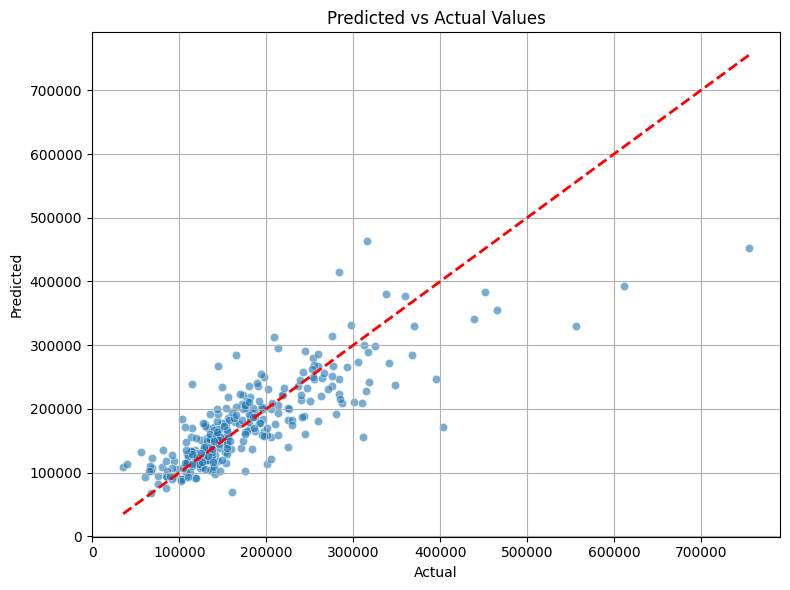

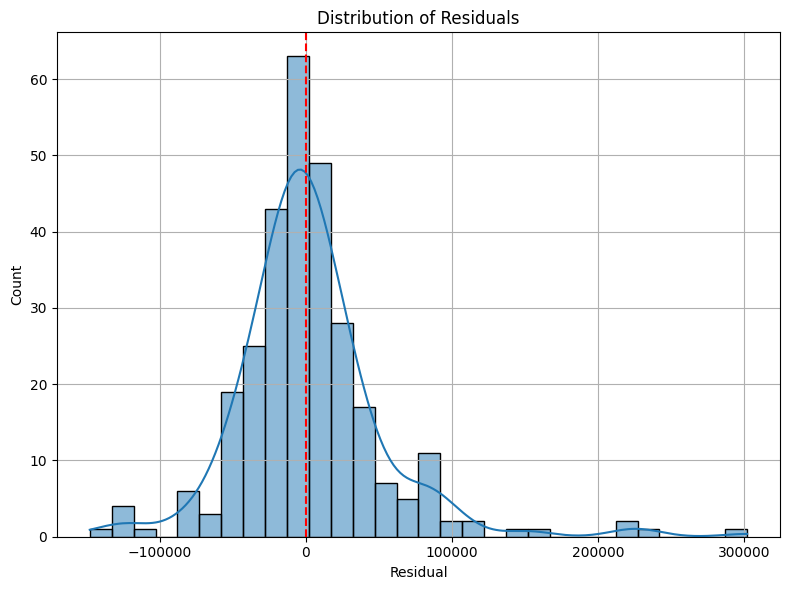

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predictions
y_pred = model_linear_regression.predict(X_test)

# Plot 1: Predicted vs Actual
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs Actual Values')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 2: Residuals
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.axvline(0, color='red', linestyle='--')
plt.xlabel('Residual')
plt.title('Distribution of Residuals')
plt.grid(True)
plt.tight_layout()
plt.show()


### Ridge

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline

model_ridge = make_pipeline(
    preprocessor,
    TransformedTargetRegressor(
        regressor=Ridge(alpha=0.5),
        func=np.log1p,  # Apply log transformation to the target variable
        inverse_func=np.expm1  # Inverse transformation to get back to original scale
    )
)

In [ ]:
model_ridge.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('poolqc',
                                                  Pipeline(steps=[('fill_missing',
                                                                   PoolQCTransformer()),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['PoolQC']),
                                                 ('misc_feature',
                                                  Pipeline(steps=[('fill_missing',
                                                                   MiscFeatureTransformer()),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_outpu...
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['BsmtQual']),
                                                 ('bsmt_fin_type1',
                                                  Pipeline(steps=[('fill_missing',
                                                                   BsmtFinType1Transformer()),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['BsmtFinType1'])])),
                ('transformedtargetregressor',
                 TransformedTargetRegressor(func=<ufunc 'log1p'>,
                                            inverse_func=<ufunc 'expm1'>,
                                            regressor=Ridge(alpha=0.5)))])

In [ ]:
y_pred = model_ridge.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = sqrt(mse)
# Metric: RMSE between log-transformed predictions and actuals
rmse_log = sqrt(mean_squared_error(np.log1p(y_test), np.log1p(y_pred)))
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Root Mean Squared Error (log-transformed): {rmse_log:.2f}")
print(f"R^2 Score: {r2:.2f}")

Root Mean Squared Error: 50458.52
Root Mean Squared Error (log-transformed): 0.25
R^2 Score: 0.67


In [ ]:
metrics.loc[len(metrics)] = ['Ridge Regression', r2, rmse, rmse_log]

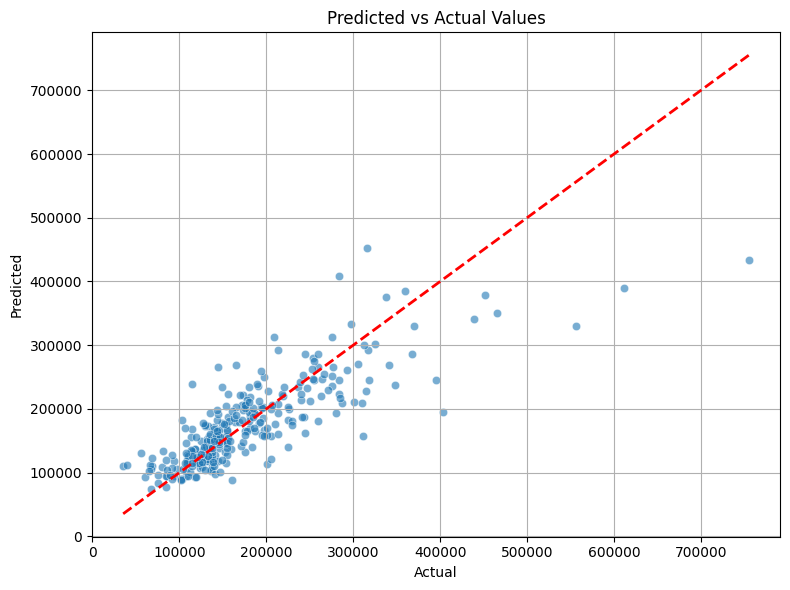

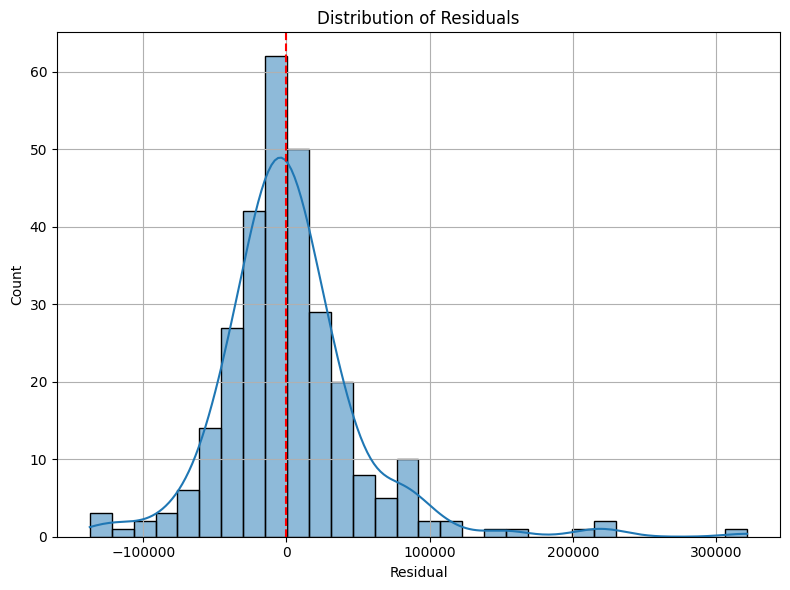

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predictions
y_pred = model_ridge.predict(X_test)

# Plot 1: Predicted vs Actual
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs Actual Values')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 2: Residuals
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.axvline(0, color='red', linestyle='--')
plt.xlabel('Residual')
plt.title('Distribution of Residuals')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.compose import TransformedTargetRegressor

# Define a list of alphas to search over
alphas = [0.01, 0.1, 1.0, 10.0, 100.0]

model_ridgecv = make_pipeline(
    preprocessor,
    TransformedTargetRegressor(
        regressor=RidgeCV(alphas=alphas, store_cv_values=True),
        func=np.log1p,      # log(1 + y) transformation
        inverse_func=np.expm1  # exp(y) - 1 to get back original target
    )
)

# best alpha


In [ ]:
model_ridgecv.fit(X_train, y_train)
best_alpha = model_ridgecv.named_steps['transformedtargetregressor'].regressor_.alpha_
print(f"Best alpha: {best_alpha:.2f}")

Best alpha: 10.00


c:\Users\quine\Documents\repos_github\notebooks\.venv\Lib\site-packages\sklearn\linear_model\_ridge.py:2385: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(


In [ ]:
model_ridgecv.fit(X_train, y_train)
y_pred = model_ridgecv.predict(X_test)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
# Metric: RMSE between log-transformed predictions and actuals
rmse_log = sqrt(mean_squared_error(np.log1p(y_test), np.log1p(y_pred)))

print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("Log RMSE:", rmse_log)
print("R² Score:", r2_score(y_test, y_pred))


RMSE: 51502.9054555451
MAE: 33150.45978813916
Log RMSE: 0.24748592685838355
R² Score: 0.6541803831136455


c:\Users\quine\Documents\repos_github\notebooks\.venv\Lib\site-packages\sklearn\linear_model\_ridge.py:2385: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(


In [ ]:
metrics.loc[len(metrics)] = ['RidgeCV Regression', r2, rmse, rmse_log]

### Lasso

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.pipeline import make_pipeline

model_lasso = make_pipeline(
    preprocessor,
    TransformedTargetRegressor(
        regressor=Lasso(alpha=0.5),
        func=np.log1p,  # Apply log transformation to the target variable
        inverse_func=np.expm1  # Inverse transformation to get back to original scale
    )
)

In [ ]:
model_lasso.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('poolqc',
                                                  Pipeline(steps=[('fill_missing',
                                                                   PoolQCTransformer()),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['PoolQC']),
                                                 ('misc_feature',
                                                  Pipeline(steps=[('fill_missing',
                                                                   MiscFeatureTransformer()),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_outpu...
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['BsmtQual']),
                                                 ('bsmt_fin_type1',
                                                  Pipeline(steps=[('fill_missing',
                                                                   BsmtFinType1Transformer()),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['BsmtFinType1'])])),
                ('transformedtargetregressor',
                 TransformedTargetRegressor(func=<ufunc 'log1p'>,
                                            inverse_func=<ufunc 'expm1'>,
                                            regressor=Lasso(alpha=0.5)))])

In [ ]:
y_pred = model_lasso.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
# Metric: RMSE between log-transformed predictions and actuals
rmse_log = sqrt(mean_squared_error(np.log1p(y_test), np.log1p(y_pred)))
r2 = r2_score(y_test, y_pred)
rmse = sqrt(mse)
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R^2 Score: {r2:.2f}")
print(f"RMSE (log-transformed): {rmse_log:.2f}")

Root Mean Squared Error: 88270.85
R^2 Score: -0.02
RMSE (log-transformed): 0.43


In [ ]:
metrics.loc[len(metrics)] = ['Lasso', r2, rmse, rmse_log]

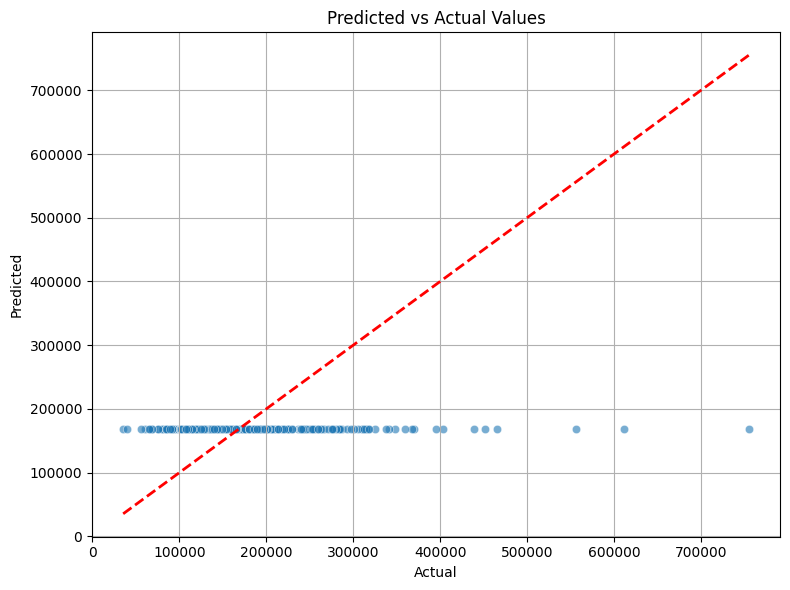

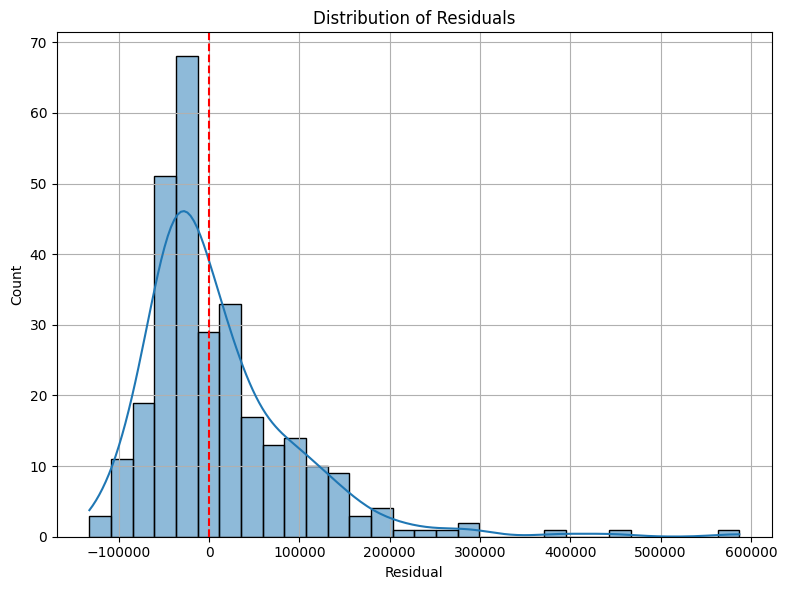

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predictions
y_pred = model_lasso.predict(X_test)

# Plot 1: Predicted vs Actual
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs Actual Values')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 2: Residuals
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.axvline(0, color='red', linestyle='--')
plt.xlabel('Residual')
plt.title('Distribution of Residuals')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.linear_model import LassoCV
from sklearn.pipeline import make_pipeline

# Define alpha candidates (LassoCV will automatically cross-validate to find the best)
alphas = [0.0001, 0.001, 0.01, 0.1, 1.0]

lasso_pipeline = make_pipeline(
    preprocessor,
    LassoCV(alphas=alphas, cv=5, max_iter=10000),
)


In [ ]:
# Wrap the pipeline with TransformedTargetRegressor
model_lasso = TransformedTargetRegressor(
    regressor=lasso_pipeline,
    func=np.log1p,        # log(1 + y)
    inverse_func=np.expm1 # exp(y) - 1
)


In [ ]:
model_lasso.fit(X_train, y_train)


TransformedTargetRegressor(func=<ufunc 'log1p'>, inverse_func=<ufunc 'expm1'>,
                           regressor=Pipeline(steps=[('columntransformer',
                                                      ColumnTransformer(transformers=[('poolqc',
                                                                                       Pipeline(steps=[('fill_missing',
                                                                                                        PoolQCTransformer()),
                                                                                                       ('onehot',
                                                                                                        OneHotEncoder(handle_unknown='ignore',
                                                                                                                      sparse_output=False))]),
                                                                                       ['PoolQC']),
                                                                                      ('misc_feature',
                                                                                       Pipeline(steps=[('fill_missing',
                                                                                                        M...
                                                                                                        BsmtQualTransformer()),
                                                                                                       ('onehot',
                                                                                                        OneHotEncoder(handle_unknown='ignore',
                                                                                                                      sparse_output=False))]),
                                                                                       ['BsmtQual']),
                                                                                      ('bsmt_fin_type1',
                                                                                       Pipeline(steps=[('fill_missing',
                                                                                                        BsmtFinType1Transformer()),
                                                                                                       ('onehot',
                                                                                                        OneHotEncoder(handle_unknown='ignore',
                                                                                                                      sparse_output=False))]),
                                                                                       ['BsmtFinType1'])])),
                                                     ('lassocv',
                                                      LassoCV(alphas=[0.0001,
                                                                      0.001,
                                                                      0.01, 0.1,
                                                                      1.0],
                                                              cv=5,
                                                              max_iter=10000))]))

In [ ]:
# Access the fitted LassoCV model inside the pipeline
lasso_model_fitted = model_lasso.regressor_.named_steps['lassocv']

# Print the best alpha
print("Best alpha selected by LassoCV:", lasso_model_fitted.alpha_)

Best alpha selected by LassoCV: 0.001


In [ ]:
# Predict on test set
y_pred = model_lasso.predict(X_test)

# Metric: RMSE between log-transformed predictions and actuals
rmse_log = sqrt(mean_squared_error(np.log1p(y_test), np.log1p(y_pred)))

print(f"Log-Scale RMSE: {rmse_log:.4f}")

# Also print normal RMSE and R^2 for comparison
rmse = sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"Normal RMSE: {rmse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Log-Scale RMSE: 0.2504
Normal RMSE: 51897.88
R^2 Score: 0.65


In [ ]:
metrics.loc[len(metrics)] = ['LassoCV', r2, rmse, rmse_log]

In [ ]:
metrics

name_model  r2_score          rmse  log-rmse
0   Linear Regression  0.663474  50806.146418  0.254084
1    Ridge Regression  0.668063  50458.523131  0.248590
2  RidgeCV Regression  0.668063  50458.523131  0.247486
3               Lasso -0.015829  88270.853655  0.433244
4             LassoCV  0.648856  51897.881041  0.250426

Create the submission file

In [ ]:
# Step 1: Drop ID column if it exists
final_test = df_test.drop(columns=['Id'], errors='ignore')

# Step 2: Predict | model_linear_regression | model_ridge | model_ridgecv | model_lasso | lasso_model_fitted
# y_test_pred = model_ridgecv.predict(final_test)

y_test_pred = model_ridgecv.predict(final_test)

submission = df_test[['Id']].copy()
submission['SalePrice'] = y_test_pred
submission.to_csv('submission.csv', index=False)
submission.head()

Id      SalePrice
0  1461  122221.270581
1  1462  135671.415034
2  1463  210065.961103
3  1464  200276.611806
4  1465  145988.770402